## 1 - Importação das bibliotecas

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [3]:
warnings.filterwarnings("ignore")

In [4]:
!pip -q install plotly --upgrade

In [5]:
pip --version

pip 22.2.2 from C:\Users\ander\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip -q install yellowbrick

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [8]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

### 1.1 - Leitura do arquivo excel referente a crimes cometidos no estado do RJ

In [10]:
base_evolucao_mensal = pd.read_excel('01_BaseDPEvolucaoMensalCisp.xlsx');

In [11]:
base_evolucao_mensal

CISP  mes   ano  mes_ano  AISP  RISP  \
0         1    1  2003  2003m01     5     1   
1         4    1  2003  2003m01     5     1   
2         5    1  2003  2003m01     5     1   
3         6    1  2003  2003m01     1     1   
4         7    1  2003  2003m01     1     1   
...     ...  ...   ...      ...   ...   ...   
31966   159   10  2022  2022m10    35     4   
31967   165   10  2022  2022m10    33     5   
31968   166   10  2022  2022m10    33     5   
31969   167   10  2022  2022m10    33     5   
31970   168   10  2022  2022m10    28     5   

                                                   munic    mcirc  \
0                                         Rio de Janeiro  3304557   
1                                         Rio de Janeiro  3304557   
2                                         Rio de Janeiro  3304557   
3                                         Rio de Janeiro  3304557   
4                                         Rio de Janeiro  3304557   
...                                                  ...      ...   
31966  Cachoeiras de Macacu                               3300803   
31967  Mangaratiba                                        3302601   
31968  Angra dos Reis                                     3300100   
31969  Paraty                                             3303807   
31970  Rio Claro                                          3304409   

                   Regiao  hom_doloso  ...  cmp  cmba  ameaca  \
0                 Capital           0  ...                 21   
1                 Capital           3  ...                 15   
2                 Capital           3  ...                 47   
3                 Capital           6  ...                 26   
4                 Capital           4  ...                 10   
...                   ...         ...  ...  ...   ...     ...   
31966  Interior                     0  ...    5     0      18   
31967  Interior                     1  ...    2     0      21   
31968  Interior                     4  ...    7     0      68   
31969  Interior                     2  ...    3     0      16   
31970  Interior                     1  ...    0     0      10   

       pessoas_desaparecidas  encontro_cadaver  encontro_ossada  \
0                          2                 0                0   
1                          6                 0                1   
2                          2                 1                0   
3                          2                 1                0   
4                          1                 3                0   
...                      ...               ...              ...   
31966                      0                 0                0   
31967                      1                 0                0   
31968                      4                 1                0   
31969                      1                 1                0   
31970                      0                 0                0   

       pol_militares_mortos_serv  pol_civis_mortos_serv  registro_ocorrencias  \
0                              0                      0                   578   
1                              0                      0                   441   
2                              0                      0                   637   
3                              0                      0                   473   
4                              0                      0                   147   
...                          ...                    ...                   ...   
31966                          0                      0                    92   
31967                          0                      0                   140   
31968                          0                      0                   495   
31969                          0                      0                   189   
31970                          0                      0                    41   

       fase  
0         3  
1         3  
2         3 

In [12]:
base_evolucao_mensal = trim_all_columns(base_evolucao_mensal)

In [13]:
base_evolucao_mensal.loc[base_evolucao_mensal['roubo_cx_eletronico'] == '']

CISP  mes   ano  mes_ano  AISP  RISP         munic    mcirc  \
9377     54    1  2009  2009m01    40     3  Belford Roxo  3300456   
9508     54    2  2009  2009m02    40     3  Belford Roxo  3300456   
9639     54    3  2009  2009m03    40     3  Belford Roxo  3300456   
9770     54    4  2009  2009m04    40     3  Belford Roxo  3300456   
9901     54    5  2009  2009m05    40     3  Belford Roxo  3300456   
10032    54    6  2009  2009m06    40     3  Belford Roxo  3300456   
10163    54    7  2009  2009m07    40     3  Belford Roxo  3300456   
10294    54    8  2009  2009m08    40     3  Belford Roxo  3300456   
10425    54    9  2009  2009m09    40     3  Belford Roxo  3300456   
10556    54   10  2009  2009m10    40     3  Belford Roxo  3300456   
10687    54   11  2009  2009m11    40     3  Belford Roxo  3300456   
10818    54   12  2009  2009m12    40     3  Belford Roxo  3300456   
10949    54    1  2010  2010m01    40     3  Belford Roxo  3300456   
11080    54    2  2010  2010m02    40     3  Belford Roxo  3300456   
11211    54    3  2010  2010m03    40     3  Belford Roxo  3300456   
11343    54    4  2010  2010m04    40     3  Belford Roxo  3300456   
11475    54    5  2010  2010m05    40     3  Belford Roxo  3300456   
11607    54    6  2010  2010m06    40     3  Belford Roxo  3300456   
11739    54    7  2010  2010m07    40     3  Belford Roxo  3300456   

                   Regiao  hom_doloso  ...  cmp  cmba  ameaca  \
9377   Baixada Fluminense          15  ...    8     0      99   
9508   Baixada Fluminense          19  ...   15     0     104   
9639   Baixada Fluminense          32  ...   12     1     102   
9770   Baixada Fluminense          23  ...   20     0      87   
9901   Baixada Fluminense          19  ...   10     0      80   
10032  Baixada Fluminense          14  ...   21     0      99   
10163  Baixada Fluminense          22  ...   26     1      82   
10294  Baixada Fluminense          17  ...   32     0      81   
10425  Baixada Fluminense          25  ...   37     0     120   
10556  Baixada Fluminense          15  ...   14     0     101   
10687  Baixada Fluminense          25  ...   15     1     112   
10818  Baixada Fluminense          20  ...   10     0     114   
10949  Baixada Fluminense          23  ...    9     0     117   
11080  Baixada Fluminense          19  ...   17     0      91   
11211  Baixada Fluminense          24  ...   14     0     101   
11343  Baixada Fluminense          19  ...    9     0     101   
11475  Baixada Fluminense          11  ...   11     0      97   
11607  Baixada Fluminense          14  ...   12     0     105   
11739  Baixada Fluminense          16  ...   12     0      94   

       pessoas_desaparecidas  encontro_cadaver  encontro_ossada  \
9377                      12                 0                0   
9508                       8                 0                0   
9639                      36                 1                0   
9770                      11                 0                0   
9901                       6                 0                0   
10032                     21                 0                0   
10163                      8                 1                0   
10294                     11                 2                0   
10425                     18                 1                0   
10556                     13                 1                0   
10687                     14                 1                0   
10818                     23                 3                0   
10949                     15                 2                0   
11080                     24                 0                0   
11211                     17                 1                0   
11343                     13                 0                0   
11475                     10                 2                0   
11607                      9                 0                0   
11739                     15    

### 1.2 - Tratamento da colunas retirando repetição de string e dados referente a valores 

In [14]:
base_evolucao_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CISP                        31971 non-null  int64 
 1   mes                         31971 non-null  int64 
 2   ano                         31971 non-null  int64 
 3   mes_ano                     31971 non-null  object
 4   AISP                        31971 non-null  int64 
 5   RISP                        31971 non-null  int64 
 6   munic                       31971 non-null  object
 7   mcirc                       31971 non-null  int64 
 8   Regiao                      31971 non-null  object
 9   hom_doloso                  31971 non-null  int64 
 10  lesao_corp_morte            31971 non-null  int64 
 11  latrocinio                  31971 non-null  int64 
 12  cvli                        31971 non-null  int64 
 13  hom_por_interv_policial     31971 non-null  in

In [15]:
base_evolucao_mensal.loc[base_evolucao_mensal['Regiao'].str.contains('Capital'), 'Regiao'] = 'Capital'
base_evolucao_mensal.loc[base_evolucao_mensal['Regiao'].str.contains('Baixada Fluminense'), 'Regiao'] = 'Baixada Fluminense'
base_evolucao_mensal.loc[base_evolucao_mensal['Regiao'].str.contains('Grande Niterói'), 'Regiao'] = 'Grande Niterói'
base_evolucao_mensal.loc[base_evolucao_mensal['Regiao'].str.contains('Interior'), 'Regiao'] = 'Interior' 

In [16]:
base_evolucao_mensal.loc[base_evolucao_mensal['posse_drogas'] == '', 'posse_drogas'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['trafico_drogas'] == '', 'trafico_drogas'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['apreensao_drogas_sem_autor'] == '', 'apreensao_drogas_sem_autor'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['apf'] == '', 'apf'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['cmp'] == '', 'cmp'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['cmba'] == '', 'cmba'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['roubo_cx_eletronico'] == '', 'roubo_cx_eletronico'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['furto_bicicleta'] == '', 'furto_bicicleta'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['aaapai'] == '', 'aaapai'] = 0
base_evolucao_mensal.loc[base_evolucao_mensal['roubo_bicicleta'] == '', 'roubo_bicicleta'] = 0

df_crimes = pd.DataFrame({'regiao': base_evolucao_mensal['Regiao'],
                                    'cisp':  base_evolucao_mensal['CISP'],
                                    'mes': base_evolucao_mensal['mes'],
                                    'ano': base_evolucao_mensal['ano'],
                                    'mes_ano': base_evolucao_mensal['mes_ano'],
                                    'aisp': base_evolucao_mensal['AISP'],
                                    'risp': base_evolucao_mensal['RISP'],
                                    'munic': base_evolucao_mensal['munic'],
                                    'mcirc': base_evolucao_mensal['mcirc'],
                                    'hom_doloso': base_evolucao_mensal['hom_doloso'],
                                    'lesao_corp_morte': base_evolucao_mensal['lesao_corp_morte'],
                                    'latrocinio': base_evolucao_mensal['latrocinio'],
                                    'cvli': base_evolucao_mensal['cvli'],
                                    'hom_por_interv_policial': base_evolucao_mensal['hom_por_interv_policial'],
                                    'letalidade_violenta': base_evolucao_mensal['letalidade_violenta'],
                                    'tentat_hom': base_evolucao_mensal['tentat_hom'],
                                    'lesao_corp_dolosa': base_evolucao_mensal['lesao_corp_dolosa'],
                                    'estupro': base_evolucao_mensal['estupro'],
                                    'hom_culposo': base_evolucao_mensal['hom_culposo'],
                                    'lesao_corp_culposa': base_evolucao_mensal['lesao_corp_culposa'],
                                    'roubo_transeunte': base_evolucao_mensal['roubo_transeunte'],
                                    'roubo_celular': base_evolucao_mensal['roubo_celular'],
                                    'roubo_em_coletivo': base_evolucao_mensal['roubo_em_coletivo'],
                                    'roubo_rua': base_evolucao_mensal['roubo_rua'],
                                    'roubo_veiculo': base_evolucao_mensal['roubo_veiculo'],
                                    'roubo_carga': base_evolucao_mensal['roubo_carga'],                                   
                                    'roubo_comercio': base_evolucao_mensal['roubo_comercio'],
                                    'roubo_residencia': base_evolucao_mensal['roubo_residencia'],
                                    'roubo_banco': base_evolucao_mensal['roubo_banco'],
                                    'roubo_cx_eletronico': base_evolucao_mensal['roubo_cx_eletronico'].astype(float),
                                    'roubo_conducao_saque': base_evolucao_mensal['roubo_conducao_saque'],
                                    'roubo_apos_saque': base_evolucao_mensal['roubo_apos_saque'],                                    
                                    'roubo_bicicleta': base_evolucao_mensal['roubo_bicicleta'].astype(float),
                                    'outros_roubos': base_evolucao_mensal['outros_roubos'],
                                    'total_roubos': base_evolucao_mensal['total_roubos'],   
                                    'furto_veiculos': base_evolucao_mensal['furto_veiculos'],                                    
                                    'furto_transeunte': base_evolucao_mensal['furto_transeunte'],
                                    'furto_coletivo': base_evolucao_mensal['furto_coletivo'],
                                    'furto_celular': base_evolucao_mensal['furto_celular'],
                                    'furto_bicicleta': base_evolucao_mensal['furto_bicicleta'].astype(float),
                                    'outros_furtos': base_evolucao_mensal['outros_furtos'],
                                    'total_furtos': base_evolucao_mensal['total_furtos'],
                                    'sequestro': base_evolucao_mensal['sequestro'],                                    
                                    'extorsao': base_evolucao_mensal['extorsao'],
                                    'sequestro_relampago': base_evolucao_mensal['sequestro_relampago'],
                                    'estelionato': base_evolucao_mensal['estelionato'],
                                    'apreensao_drogas': base_evolucao_mensal['apreensao_drogas'],
                                    'posse_drogas': base_evolucao_mensal['posse_drogas'].astype(float),
                                    'trafico_drogas': base_evolucao_mensal['trafico_drogas'].astype(float),
                                    'apreensao_drogas_sem_autor': base_evolucao_mensal['apreensao_drogas_sem_autor'].astype(float),                                    
                                    'recuperacao_veiculos': base_evolucao_mensal['recuperacao_veiculos'],
                                    'apf': base_evolucao_mensal['apf'].astype(float),
                                    'aaapai': base_evolucao_mensal['aaapai'].astype(float),
                                    'cmp': base_evolucao_mensal['cmp'].astype(float),
                                    'cmba': base_evolucao_mensal['cmba'].astype(float),
                                    'ameaca': base_evolucao_mensal['ameaca'],
                                    'pessoas_desaparecidas': base_evolucao_mensal['pessoas_desaparecidas'],                                    
                                    'encontro_cadaver': base_evolucao_mensal['encontro_cadaver'],
                                    'encontro_ossada': base_evolucao_mensal['encontro_ossada'],
                                    'pol_militares_mortos_serv': base_evolucao_mensal['pol_militares_mortos_serv'],
                                    'pol_civis_mortos_serv': base_evolucao_mensal['pol_civis_mortos_serv'],
                                    'registro_ocorrencias': base_evolucao_mensal['registro_ocorrencias'],
                                    'fase': base_evolucao_mensal['fase']
                                    
})

dtf_evolucao_mensal = df_crimes

In [17]:
base_evolucao_mensal.isnull().sum()

CISP                         0
mes                          0
ano                          0
mes_ano                      0
AISP                         0
                            ..
encontro_ossada              0
pol_militares_mortos_serv    0
pol_civis_mortos_serv        0
registro_ocorrencias         0
fase                         0
Length: 63, dtype: int64

In [18]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   regiao                      31971 non-null  object 
 1   cisp                        31971 non-null  int64  
 2   mes                         31971 non-null  int64  
 3   ano                         31971 non-null  int64  
 4   mes_ano                     31971 non-null  object 
 5   aisp                        31971 non-null  int64  
 6   risp                        31971 non-null  int64  
 7   munic                       31971 non-null  object 
 8   mcirc                       31971 non-null  int64  
 9   hom_doloso                  31971 non-null  int64  
 10  lesao_corp_morte            31971 non-null  int64  
 11  latrocinio                  31971 non-null  int64  
 12  cvli                        31971 non-null  int64  
 13  hom_por_interv_policial     319

In [19]:
df_crimes

regiao  cisp  mes   ano  mes_ano  aisp  risp                 munic  \
0       Capital     1    1  2003  2003m01     5     1        Rio de Janeiro   
1       Capital     4    1  2003  2003m01     5     1        Rio de Janeiro   
2       Capital     5    1  2003  2003m01     5     1        Rio de Janeiro   
3       Capital     6    1  2003  2003m01     1     1        Rio de Janeiro   
4       Capital     7    1  2003  2003m01     1     1        Rio de Janeiro   
...         ...   ...  ...   ...      ...   ...   ...                   ...   
31966  Interior   159   10  2022  2022m10    35     4  Cachoeiras de Macacu   
31967  Interior   165   10  2022  2022m10    33     5           Mangaratiba   
31968  Interior   166   10  2022  2022m10    33     5        Angra dos Reis   
31969  Interior   167   10  2022  2022m10    33     5                Paraty   
31970  Interior   168   10  2022  2022m10    28     5             Rio Claro   

         mcirc  hom_doloso  ...  cmp  cmba  ameaca  pessoas_desaparecidas  \
0      3304557           0  ...  0.0   0.0      21                      2   
1      3304557           3  ...  0.0   0.0      15                      6   
2      3304557           3  ...  0.0   0.0      47                      2   
3      3304557           6  ...  0.0   0.0      26                      2   
4      3304557           4  ...  0.0   0.0      10                      1   
...        ...         ...  ...  ...   ...     ...                    ...   
31966  3300803           0  ...  5.0   0.0      18                      0   
31967  3302601           1  ...  2.0   0.0      21                      1   
31968  3300100           4  ...  7.0   0.0      68                      4   
31969  3303807           2  ...  3.0   0.0      16                      1   
31970  3304409           1  ...  0.0   0.0      10                      0   

       encontro_cadaver  encontro_ossada  pol_militares_mortos_serv  \
0                     0                0                          0   
1                     0                1                          0   
2                     1                0                          0   
3                     1                0                          0   
4                     3                0                          0   
...                 ...              ...                        ...   
31966                 0                0                          0   
31967                 0                0                          0   
31968                 1                0                          0   
31969                 1                0                          0   
31970                 0                0                          0   

       pol_civis_mortos_serv  registro_ocorrencias  fase  
0                          0                   578     3  
1                          0                   441     3  
2                          0                   637     3  
3                          0                   473     3  
4                          0                   147     3  
...                      ...                   ...   ...  
31966                      0                    92     2  
31967                      0                   140     2  
31968                      0                   495     2  
31969                      0                   189     2  
31970                      0                    41     2  

[31971 rows x 63 columns]

In [20]:
dtf_evolucao_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   regiao                      31971 non-null  object 
 1   cisp                        31971 non-null  int64  
 2   mes                         31971 non-null  int64  
 3   ano                         31971 non-null  int64  
 4   mes_ano                     31971 non-null  object 
 5   aisp                        31971 non-null  int64  
 6   risp                        31971 non-null  int64  
 7   munic                       31971 non-null  object 
 8   mcirc                       31971 non-null  int64  
 9   hom_doloso                  31971 non-null  int64  
 10  lesao_corp_morte            31971 non-null  int64  
 11  latrocinio                  31971 non-null  int64  
 12  cvli                        31971 non-null  int64  
 13  hom_por_interv_policial     319

In [21]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   regiao                      31971 non-null  object 
 1   cisp                        31971 non-null  int64  
 2   mes                         31971 non-null  int64  
 3   ano                         31971 non-null  int64  
 4   mes_ano                     31971 non-null  object 
 5   aisp                        31971 non-null  int64  
 6   risp                        31971 non-null  int64  
 7   munic                       31971 non-null  object 
 8   mcirc                       31971 non-null  int64  
 9   hom_doloso                  31971 non-null  int64  
 10  lesao_corp_morte            31971 non-null  int64  
 11  latrocinio                  31971 non-null  int64  
 12  cvli                        31971 non-null  int64  
 13  hom_por_interv_policial     319

### 2 - Criando colunas de Totais referente a categoria de crime agrupando por ano, mes e regiao

#### 2.1 - Por Crimes Violentos

In [22]:
df_crimes['total_crimes_violentos'] = 0
df_crimes['total_crimes_violentos'] = (df_crimes['hom_doloso'] +
                                                df_crimes['lesao_corp_morte'] +
                                                df_crimes['latrocinio'] +
                                                df_crimes['cvli'] +
                                                df_crimes['hom_por_interv_policial'] +
                                                df_crimes['letalidade_violenta'] +
                                                df_crimes['tentat_hom'] +
                                                df_crimes['lesao_corp_dolosa'] +
                                                df_crimes['estupro'])

#### 2.2 - Crimes de trânsito

In [23]:
df_crimes['total_crimes_transito'] = 0
df_crimes['total_crimes_transito'] = (df_crimes['hom_culposo'] + df_crimes['lesao_corp_culposa'])

#### 2.3 - Outros crimes contra o patrimônio

In [24]:
df_crimes['total_crimes_patrimonio'] = 0
df_crimes['total_crimes_patrimonio'] = (df_crimes['sequestro'] +
                                                 df_crimes['extorsao'] +
                                                 df_crimes['sequestro_relampago'] + 
                                                 df_crimes['estelionato'])

#### 2.4 - Atividade Policial

In [25]:
df_crimes['total_atividade_policial'] = 0
df_crimes['total_atividade_policial'] = (df_crimes['apreensao_drogas'] +
                                                   df_crimes['posse_drogas'] + 
                                                   df_crimes['trafico_drogas'] +
                                                   df_crimes['apreensao_drogas_sem_autor'] +
                                                   df_crimes['apf'] +
                                                   df_crimes['aaapai'] +
                                                   df_crimes['cmp'] +
                                                   df_crimes['cmba'])

#### 2.5 - Outros Registros

In [26]:
df_crimes['total_outros_registros'] = 0
df_crimes['total_outros_registros'] = (df_crimes['ameaca'] + 
                                                 df_crimes['pessoas_desaparecidas'] + 
                                                 df_crimes['encontro_cadaver'] +
                                                 df_crimes['encontro_ossada'] + 
                                                 df_crimes['pol_militares_mortos_serv'] + 
                                                 df_crimes['pol_civis_mortos_serv'])

In [27]:
df_crimes.loc[df_crimes['regiao'].isnull() | df_crimes['cisp'].isnull() | df_crimes['mes'].isnull() | df_crimes['ano'].isnull()
             | df_crimes['mes_ano'].isnull() | df_crimes['aisp'].isnull() | df_crimes['risp'].isnull() | df_crimes['munic'].isnull()
             | df_crimes['mcirc'].isnull() | df_crimes['hom_doloso'].isnull() | df_crimes['lesao_corp_morte'].isnull() | df_crimes['latrocinio'].isnull()
             | df_crimes['cvli'].isnull() | df_crimes['hom_por_interv_policial'].isnull() | df_crimes['letalidade_violenta'].isnull() | df_crimes['tentat_hom'].isnull()
             | df_crimes['lesao_corp_dolosa'].isnull() | df_crimes['estupro'].isnull() | df_crimes['hom_culposo'].isnull() | df_crimes['lesao_corp_culposa'].isnull()
             | df_crimes['roubo_transeunte'].isnull() | df_crimes['roubo_celular'].isnull() | df_crimes['roubo_em_coletivo'].isnull() | df_crimes['roubo_rua'].isnull()
             | df_crimes['roubo_veiculo'].isnull() | df_crimes['roubo_carga'].isnull() | df_crimes['roubo_comercio'].isnull() | df_crimes['roubo_residencia'].isnull()
             | df_crimes['roubo_banco'].isnull() | df_crimes['roubo_cx_eletronico'].isnull() | df_crimes['roubo_conducao_saque'].isnull() | df_crimes['roubo_apos_saque'].isnull()
             | df_crimes['outros_roubos'].isnull() | df_crimes['total_roubos'].isnull() | df_crimes['furto_veiculos'].isnull() | df_crimes['furto_transeunte'].isnull()
             | df_crimes['furto_coletivo'].isnull() | df_crimes['furto_celular'].isnull() | df_crimes['furto_bicicleta'].isnull() | df_crimes['outros_furtos'].isnull()
             | df_crimes['total_furtos'].isnull() | df_crimes['sequestro'].isnull() | df_crimes['extorsao'].isnull() | df_crimes['sequestro_relampago'].isnull()
             | df_crimes['estelionato'].isnull() | df_crimes['apreensao_drogas'].isnull() | df_crimes['posse_drogas'].isnull() | df_crimes['trafico_drogas'].isnull()
             | df_crimes['apreensao_drogas_sem_autor'].isnull() | df_crimes['recuperacao_veiculos'].isnull() | df_crimes['apf'].isnull() | df_crimes['aaapai'].isnull()
             | df_crimes['cmp'].isnull() | df_crimes['cmba'].isnull() | df_crimes['ameaca'].isnull() | df_crimes['pessoas_desaparecidas'].isnull()
             | df_crimes['encontro_cadaver'].isnull() | df_crimes['encontro_ossada'].isnull() | df_crimes['pol_militares_mortos_serv'].isnull() | df_crimes['pol_civis_mortos_serv'].isnull()
             | df_crimes['registro_ocorrencias'].isnull() | df_crimes['fase'].isnull() | df_crimes['total_crimes_violentos'].isnull() | df_crimes['total_crimes_transito'].isnull()
             | df_crimes['total_crimes_patrimonio'].isnull() | df_crimes['total_atividade_policial'].isnull() | df_crimes['total_outros_registros'].isnull()]

Empty DataFrame
Columns: [regiao, cisp, mes, ano, mes_ano, aisp, risp, munic, mcirc, hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial, letalidade_violenta, tentat_hom, lesao_corp_dolosa, estupro, hom_culposo, lesao_corp_culposa, roubo_transeunte, roubo_celular, roubo_em_coletivo, roubo_rua, roubo_veiculo, roubo_carga, roubo_comercio, roubo_residencia, roubo_banco, roubo_cx_eletronico, roubo_conducao_saque, roubo_apos_saque, roubo_bicicleta, outros_roubos, total_roubos, furto_veiculos, furto_transeunte, furto_coletivo, furto_celular, furto_bicicleta, outros_furtos, total_furtos, sequestro, extorsao, sequestro_relampago, estelionato, apreensao_drogas, posse_drogas, trafico_drogas, apreensao_drogas_sem_autor, recuperacao_veiculos, apf, aaapai, cmp, cmba, ameaca, pessoas_desaparecidas, encontro_cadaver, encontro_ossada, pol_militares_mortos_serv, pol_civis_mortos_serv, registro_ocorrencias, fase, total_crimes_violentos, total_crimes_transito, total_crimes_patrimonio, total_atividade_policial, total_outros_registros]
Index: []

[0 rows x 68 columns]

In [28]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   regiao                      31971 non-null  object 
 1   cisp                        31971 non-null  int64  
 2   mes                         31971 non-null  int64  
 3   ano                         31971 non-null  int64  
 4   mes_ano                     31971 non-null  object 
 5   aisp                        31971 non-null  int64  
 6   risp                        31971 non-null  int64  
 7   munic                       31971 non-null  object 
 8   mcirc                       31971 non-null  int64  
 9   hom_doloso                  31971 non-null  int64  
 10  lesao_corp_morte            31971 non-null  int64  
 11  latrocinio                  31971 non-null  int64  
 12  cvli                        31971 non-null  int64  
 13  hom_por_interv_policial     319

In [29]:
df_crimes.columns

Index(['regiao', 'cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic',
       'mcirc', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [30]:
dtf_evolucao_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31971 entries, 0 to 31970
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   regiao                      31971 non-null  object 
 1   cisp                        31971 non-null  int64  
 2   mes                         31971 non-null  int64  
 3   ano                         31971 non-null  int64  
 4   mes_ano                     31971 non-null  object 
 5   aisp                        31971 non-null  int64  
 6   risp                        31971 non-null  int64  
 7   munic                       31971 non-null  object 
 8   mcirc                       31971 non-null  int64  
 9   hom_doloso                  31971 non-null  int64  
 10  lesao_corp_morte            31971 non-null  int64  
 11  latrocinio                  31971 non-null  int64  
 12  cvli                        31971 non-null  int64  
 13  hom_por_interv_policial     319

### Criação do Dataframe de Totais de Crimes

In [31]:
dtf_crimes_por_cisp = df_crimes.groupby(['regiao', 'cisp', 'munic', 'ano', 'mes'])['total_roubos',
                                                                   'total_furtos',
                                                                   'total_crimes_violentos',
                                                                   'total_crimes_patrimonio',
                                                                   'total_atividade_policial',
                                                                   'total_outros_registros',
                                                                   'total_crimes_transito',
                                                                   'registro_ocorrencias'].apply(lambda x : x.astype(float).sum()).reset_index()
dtf_crimes_por_cisp

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  
0                       13.0                 139.0  
1                        8.0                 187.0  
2                       15.0                 140.0  
3                        5.0                 194.0  
4                        8.0                 169.0  
...                      ...                   ...  
31966                    3.0                  40.0  
31967                    3.0                  38.0  
31968                    1.0                  49.0  
31969                    4.0                  40.0  
31970                    0.0                  41.0  

[31971 rows x 13 columns]

### 3.2 - Importação do segundo arquivo - dados das UPPs de 2007 a 2021

In [32]:
base_upp = pd.read_excel('02 - UppEvolucaoMensalDeTitulos.xlsx')

#### 3.2.1 -  Retirando o espaçamento dos dados nas colunas

In [33]:
base_upp = trim_all_columns(base_upp)

#### 3.2.2 -  Agrupando colunas de acordo com o dicionario de dados

#### Total de Crimes Violentos

In [34]:
base_upp['total_crimes_violentos'] = 0
base_upp['total_crimes_violentos'] = (base_upp['hom_doloso'] +
                                                base_upp['lesao_corp_morte'] +
                                                base_upp['latrocinio'] +
                                                base_upp['hom_por_interv_policial'] +
                                                base_upp['tentat_hom'] +
                                                base_upp['lesao_corp_dolosa'] +
                                                base_upp['estupro'])

#### Total de Crimes de trânsitos

In [35]:
base_upp['total_crimes_transito'] = 0
base_upp['total_crimes_transito'] = (base_upp['hom_culposo'] + base_upp['lesao_corp_culposa'])

#### Total de Crimes Contra o Patrimônio

In [36]:
base_upp['total_crimes_patrimonio'] = 0
base_upp['total_crimes_patrimonio'] = (base_upp['sequestro'] +
                                                 base_upp['extorsao'] +
                                                 base_upp['sequestro_relampago'] + 
                                                 base_upp['estelionato'])

#### Total Atividade Policial

In [37]:
base_upp['total_atividade_policial'] = 0
base_upp['total_atividade_policial'] = (base_upp['apreensao_drogas'] +
                                        base_upp['recuperacao_veiculos'] +
                                        base_upp['armas_apreendidas'] +
                                        base_upp['cump_mandado_prisao'] +
                                        base_upp['ocorr_flagrante'])

#### Total Outros Registros

In [38]:
base_upp['total_outros_registros'] = 0
base_upp['total_outros_registros'] = (base_upp['ameaca'] + 
                                                 base_upp['pessoas_desaparecidas'] + 
                                                 base_upp['encontro_cadaver'] +
                                                 base_upp['pol_militares_mortos_serv'] +
                                                 base_upp['pol_civis_mortos_serv'] +
                                                 base_upp['encontro_ossada'])

In [39]:
base_upp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7638 entries, 0 to 7637
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cod_upp                    7638 non-null   int64 
 1   upp                        7638 non-null   object
 2   ano                        7638 non-null   int64 
 3   mes                        7638 non-null   int64 
 4   hom_doloso                 7638 non-null   int64 
 5   lesao_corp_morte           7638 non-null   int64 
 6   latrocinio                 7638 non-null   int64 
 7   hom_por_interv_policial    7638 non-null   int64 
 8   tentat_hom                 7638 non-null   int64 
 9   lesao_corp_dolosa          7638 non-null   int64 
 10  estupro                    7638 non-null   int64 
 11  hom_culposo                7638 non-null   int64 
 12  lesao_corp_culposa         7638 non-null   int64 
 13  roubo_comercio             7638 non-null   int64 
 14  roubo_re

In [40]:
base_upp.isnull().sum()

cod_upp                      0
upp                          0
ano                          0
mes                          0
hom_doloso                   0
lesao_corp_morte             0
latrocinio                   0
hom_por_interv_policial      0
tentat_hom                   0
lesao_corp_dolosa            0
estupro                      0
hom_culposo                  0
lesao_corp_culposa           0
roubo_comercio               0
roubo_residencia             0
roubo_veiculo                0
roubo_carga                  0
roubo_transeunte             0
roubo_em_coletivo            0
roubo_banco                  0
roubo_cx_eletronico          0
roubo_celular                0
roubo_conducao_saque         0
total_roubos                 0
furto_veiculos               0
total_furtos                 0
sequestro                    0
extorsao                     0
sequestro_relampago          0
estelionato                  0
apreensao_drogas             0
recuperacao_veiculos         0
armas_ap

### 3.3 - Importação do arquivo sobre armas

In [41]:
base_armas = pd.ExcelFile('03 - ArmasApreendidasEvolucaoCisp.xlsx')

In [42]:
base_armas.sheet_names

['Arma_de_Fogo', 'Arma_Branca', 'Artefato_Explosivo', 'Municao', 'Simulacro']

#### 3.3.1 - Separação dos vários dataframes que esse arquivo compoe

In [43]:
with pd.ExcelFile('03 - ArmasApreendidasEvolucaoCisp.xlsx', engine = "openpyxl") as baseArmas:
        baseArmasFogo = pd.read_excel(baseArmas, "Arma_de_Fogo")
        baseArmasBranca = pd.read_excel(baseArmas, "Arma_Branca")
        baseArmasExplosivo = pd.read_excel(baseArmas, "Artefato_Explosivo")
        baseArmasMunicao = pd.read_excel(baseArmas, "Municao")
        baseArmasSimulacro = pd.read_excel(baseArmas, "Simulacro")

#### Dataframe Armas de Fogo

In [44]:
baseArmasFogo = trim_all_columns(baseArmasFogo)
baseArmasFogo

cisp  mes   ano  aisp  risp  arma_fabricacao_caseira  carabina  \
0         1    1  2007     5     1                        0         0   
1         1    2  2007     5     1                        0         0   
2         1    3  2007     5     1                        0         0   
3         1    4  2007     5     1                        0         0   
4         1    5  2007     5     1                        0         0   
...     ...  ...   ...   ...   ...                      ...       ...   
26443   168    8  2022    28     5                        0         0   
26444   168    9  2022    28     5                        0         0   
26445   168   10  2022    28     5                        0         0   
26446   168   11  2022    28     5                        0         0   
26447   168   12  2022    28     5                        0         0   

       espingarda  fuzil  garrucha  garruchao  metralhadora  outros  pistola  \
0               0      0         0          0             0       0        0   
1               0      0         0          0             0       0        0   
2               0      0         0          0             0       0        0   
3               0      0         0          0             0       1        4   
4               0      0         6          0             0       0        1   
...           ...    ...       ...        ...           ...     ...      ...   
26443           0      0         0          0             0       0        0   
26444           0      0         0          0             0       0        0   
26445           0      0         0          0             0       0        0   
26446           0      0         0          0             0       0        0   
26447           0      0         0          0             0       0        0   

       revolver  submetralhadora  total  
0             2                0      2  
1             1                0      1  
2             0                0      0  
3             1                0      6  
4             2                0      9  
...         ...              ...    ...  
26443         0                0      0  
26444         0                0      0  
26445         0                0      0  
26446         0                0      0  
26447         0                0      0  

[26448 rows x 17 columns]

#### DataFrame armas de fogo agrupadas

In [45]:
dt_armas_fogo_group = baseArmasFogo.groupby(['cisp','mes','ano'])['total'].apply(lambda x : x.astype(float).sum()).reset_index()

In [46]:
dt_armas_fogo_group

cisp  mes   ano  total
0         1    1  2007    2.0
1         1    1  2008    3.0
2         1    1  2009    3.0
3         1    1  2010    0.0
4         1    1  2011    0.0
...     ...  ...   ...    ...
26443   168   12  2018    0.0
26444   168   12  2019    2.0
26445   168   12  2020    2.0
26446   168   12  2021    0.0
26447   168   12  2022    0.0

[26448 rows x 4 columns]

#### Coluna total armas de fogo

In [47]:
dt_armas_fogo_group = dt_armas_fogo_group.rename(columns={'total':'total_armas_fogo'})

In [48]:
dt_armas_fogo_group

cisp  mes   ano  total_armas_fogo
0         1    1  2007               2.0
1         1    1  2008               3.0
2         1    1  2009               3.0
3         1    1  2010               0.0
4         1    1  2011               0.0
...     ...  ...   ...               ...
26443   168   12  2018               0.0
26444   168   12  2019               2.0
26445   168   12  2020               2.0
26446   168   12  2021               0.0
26447   168   12  2022               0.0

[26448 rows x 4 columns]

#### DataFrame armas brancas

In [49]:
baseArmasBranca = trim_all_columns(baseArmasBranca)
baseArmasBranca

cisp  mes   ano  aisp  risp  total
0         1    1  2016     5     1      0
1         1    2  2016     5     1      2
2         1    3  2016     5     1      1
3         1    4  2016     5     1      1
4         1    5  2016     5     1      0
...     ...  ...   ...   ...   ...    ...
11539   168    8  2022    28     5      1
11540   168    9  2022    28     5      0
11541   168   10  2022    28     5      0
11542   168   11  2022    28     5      0
11543   168   12  2022    28     5      0

[11544 rows x 6 columns]

#### DataFrame armas brancas agrupadas

In [50]:
dt_arma_branca_group = baseArmasBranca.groupby(['cisp','mes','ano'])['total'].apply(lambda x : x.astype(float).sum()).reset_index()

In [51]:
dt_arma_branca_group

cisp  mes   ano  total
0         1    1  2016    0.0
1         1    1  2017    2.0
2         1    1  2018    1.0
3         1    1  2019    0.0
4         1    1  2020    1.0
...     ...  ...   ...    ...
11539   168   12  2018    0.0
11540   168   12  2019    0.0
11541   168   12  2020    0.0
11542   168   12  2021    0.0
11543   168   12  2022    0.0

[11544 rows x 4 columns]

#### Coluna Total Armas Brancas

In [52]:
dt_arma_branca_group = dt_arma_branca_group.rename(columns={'total':'total_armas_brancas'})

In [53]:
dt_arma_branca_group

cisp  mes   ano  total_armas_brancas
0         1    1  2016                  0.0
1         1    1  2017                  2.0
2         1    1  2018                  1.0
3         1    1  2019                  0.0
4         1    1  2020                  1.0
...     ...  ...   ...                  ...
11539   168   12  2018                  0.0
11540   168   12  2019                  0.0
11541   168   12  2020                  0.0
11542   168   12  2021                  0.0
11543   168   12  2022                  0.0

[11544 rows x 4 columns]

#### DataFrame Armas Explosivo

In [54]:
baseArmasExplosivo = trim_all_columns(baseArmasExplosivo)

#### DataFrame armas explosivo agrupadas

In [55]:
dt_armas_explosivo_group = baseArmasExplosivo.groupby(['cisp','mes','ano'])['total'].apply(lambda x : x.astype(float).sum()).reset_index()

In [56]:
dt_armas_explosivo_group

cisp  mes   ano  total
0         1    1  2012    0.0
1         1    1  2013    0.0
2         1    1  2014    0.0
3         1    1  2015    0.0
4         1    1  2016    0.0
...     ...  ...   ...    ...
18163   168   12  2018    0.0
18164   168   12  2019    0.0
18165   168   12  2020    0.0
18166   168   12  2021    0.0
18167   168   12  2022    0.0

[18168 rows x 4 columns]

#### Coluna Total de Explosivo

In [57]:
dt_armas_explosivo_group = dt_armas_explosivo_group.rename(columns={'total':'total_explosivo'})

In [58]:
dt_armas_explosivo_group

cisp  mes   ano  total_explosivo
0         1    1  2012              0.0
1         1    1  2013              0.0
2         1    1  2014              0.0
3         1    1  2015              0.0
4         1    1  2016              0.0
...     ...  ...   ...              ...
18163   168   12  2018              0.0
18164   168   12  2019              0.0
18165   168   12  2020              0.0
18166   168   12  2021              0.0
18167   168   12  2022              0.0

[18168 rows x 4 columns]

#### Dataframe Munição

In [59]:
baseArmasMunicao = trim_all_columns(baseArmasMunicao)
baseArmasMunicao

cisp  mes   ano  aisp  risp  total
0         1    1  2014     5     1      3
1         1    2  2014     5     1      5
2         1    3  2014     5     1     10
3         1    4  2014     5     1      2
4         1    5  2014     5     1      0
...     ...  ...   ...   ...   ...    ...
14851   168    8  2022    28     5      0
14852   168    9  2022    28     5      0
14853   168   10  2022    28     5      0
14854   168   11  2022    28     5      0
14855   168   12  2022    28     5      0

[14856 rows x 6 columns]

#### DataFrame munição agrupadas

In [60]:
dt_armas_municao_group = baseArmasMunicao.groupby(['cisp','mes','ano'])['total'].apply(lambda x : x.astype(float).sum()).reset_index()

In [61]:
dt_armas_municao_group

cisp  mes   ano  total
0         1    1  2014    3.0
1         1    1  2015    5.0
2         1    1  2016   33.0
3         1    1  2017   12.0
4         1    1  2018    4.0
...     ...  ...   ...    ...
14851   168   12  2018    0.0
14852   168   12  2019   21.0
14853   168   12  2020    2.0
14854   168   12  2021    0.0
14855   168   12  2022    0.0

[14856 rows x 4 columns]

In [62]:
dt_armas_municao_group = dt_armas_municao_group.rename(columns={'total':'total_municao'})

In [63]:
dt_armas_municao_group

cisp  mes   ano  total_municao
0         1    1  2014            3.0
1         1    1  2015            5.0
2         1    1  2016           33.0
3         1    1  2017           12.0
4         1    1  2018            4.0
...     ...  ...   ...            ...
14851   168   12  2018            0.0
14852   168   12  2019           21.0
14853   168   12  2020            2.0
14854   168   12  2021            0.0
14855   168   12  2022            0.0

[14856 rows x 4 columns]

#### DataFrame simulacro agrupadas

In [64]:
baseArmasSimulacro = trim_all_columns(baseArmasSimulacro)
baseArmasSimulacro

cisp  mes   ano  aisp  risp  airsoft  arma_fabricacao_caseira  \
0         1    1  2014     5     1        0                        0   
1         1    2  2014     5     1        0                        0   
2         1    3  2014     5     1        0                        0   
3         1    4  2014     5     1        0                        0   
4         1    5  2014     5     1        0                        0   
...     ...  ...   ...   ...   ...      ...                      ...   
14851   168    8  2022    28     5        0                        0   
14852   168    9  2022    28     5        0                        0   
14853   168   10  2022    28     5        0                        0   
14854   168   11  2022    28     5        0                        0   
14855   168   12  2022    28     5        0                        0   

       carabina  espingarda  fuzil  garrucha  garruchao  metralhadora  outros  \
0             0           0      0         0          0             0       0   
1             0           0      0         0          0             0       0   
2             0           0      0         0          0             0       0   
3             0           0      0         0          0             0       0   
4             0           0      0         0          0             0       0   
...         ...         ...    ...       ...        ...           ...     ...   
14851         0           0      0         0          0             0       0   
14852         0           0      0         0          0             0       0   
14853         0           0      0         0          0             0       0   
14854         0           0      0         0          0             0       0   
14855         0           0      0         0          0             0       0   

       paintball  pistola  revolver  submetralhadora  total  
0              0        0         0                0      0  
1              0        0         0                0      0  
2              0        0         0                0      0  
3              0        0         0                0      0  
4              0        0         0                0      0  
...          ...      ...       ...              ...    ...  
14851          0        0         0                0      0  
14852          0        0         0                0      0  
14853          0        0         0                0      0  
14854          0        0         0                0      0  
14855          0        0         0                0      0  

[14856 rows x 19 columns]

#### Simulacro dados agrupados

In [65]:
dt_armas_simulacro_group = baseArmasSimulacro.groupby(['cisp','mes','ano'])['total'].apply(lambda x : x.astype(float).sum()).reset_index()

In [66]:
dt_armas_simulacro_group

cisp  mes   ano  total
0         1    1  2014    0.0
1         1    1  2015    1.0
2         1    1  2016    0.0
3         1    1  2017    0.0
4         1    1  2018    1.0
...     ...  ...   ...    ...
14851   168   12  2018    0.0
14852   168   12  2019    0.0
14853   168   12  2020    0.0
14854   168   12  2021    0.0
14855   168   12  2022    0.0

[14856 rows x 4 columns]

#### Coluna Total de Munição

In [67]:
dt_armas_simulacro_group = dt_armas_simulacro_group.rename(columns={'total':'total_simulacro'})

In [68]:
dt_armas_simulacro_group

cisp  mes   ano  total_simulacro
0         1    1  2014              0.0
1         1    1  2015              1.0
2         1    1  2016              0.0
3         1    1  2017              0.0
4         1    1  2018              1.0
...     ...  ...   ...              ...
14851   168   12  2018              0.0
14852   168   12  2019              0.0
14853   168   12  2020              0.0
14854   168   12  2021              0.0
14855   168   12  2022              0.0

[14856 rows x 4 columns]

### União entre os DataFrames

#### Join com o DataFrame Armas de Fogo

In [69]:
df_crimes_armas = pd.merge(dtf_crimes_por_cisp, dt_armas_fogo_group, on=['ano', 'mes', 'cisp'], how="left")

In [70]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  
0                       13.0                 139.0               NaN  
1                        8.0                 187.0               NaN  
2                       15.0                 140.0               NaN  
3                        5.0                 194.0               NaN  
4                        8.0                 169.0               NaN  
...                      ...                   ...               ...  
31966                    3.0                  40.0               0.0  
31967                    3.0                  38.0               1.0  
31968                    1.0                  49.0               0.0  
31969                    4.0                  40.0               0.0  
31970                    0.0                  41.0               0.0  

[31971 rows x 14 columns]

#### Tratamento para os campos nulos referente a armas de fogo

In [71]:
df_crimes_armas.loc[df_crimes_armas['total_armas_fogo'].isnull()]

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31776            Interior   168   Rio Claro  2006    8           0.0   
31777            Interior   168   Rio Claro  2006    9           1.0   
31778            Interior   168   Rio Claro  2006   10           0.0   
31779            Interior   168   Rio Claro  2006   11           0.0   
31780            Interior   168   Rio Claro  2006   12           0.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31776           4.0                     2.0                      0.0   
31777           3.0                    13.0                      2.0   
31778           3.0                    10.0                      0.0   
31779           4.0                    12.0                      2.0   
31780           6.0                    12.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31776                       8.0                     4.0   
31777                       7.0                     1.0   
31778                       6.0                     2.0   
31779                       3.0                     3.0   
31780                       8.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  
0                       13.0                 139.0               NaN  
1                        8.0                 187.0               NaN  
2                       15.0                 140.0               NaN  
3                        5.0                 194.0               NaN  
4                        8.0                 169.0               NaN  
...                      ...                   ...               ...  
31776                    3.0                  30.0               NaN  
31777                    6.0                  49.0               NaN  
31778                    7.0                  37.0               NaN  
31779                    6.0                  43.0               NaN  
31780                   13.0                  51.0               NaN  

[6206 rows x 14 columns]

In [72]:
df_crimes_armas.loc[df_crimes_armas['total_armas_fogo'].isnull(), 'total_armas_fogo'] = 0

In [73]:
df_crimes_armas.loc[df_crimes_armas['total_armas_fogo'].isnull()]

Empty DataFrame
Columns: [regiao, cisp, munic, ano, mes, total_roubos, total_furtos, total_crimes_violentos, total_crimes_patrimonio, total_atividade_policial, total_outros_registros, total_crimes_transito, registro_ocorrencias, total_armas_fogo]
Index: []

#### Join com o DataFrame Armas Brancas

In [74]:
df_crimes_armas = pd.merge(df_crimes_armas, dt_arma_branca_group, on=['ano', 'mes', 'cisp'], how="left")

In [75]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
31966                  0.0  
31967                  0.0  
31968                  1.0  
31969                  0.0  
31970                  0.0  

[31971 rows x 15 columns]

#### Tratamento de campos nulos para o total de armas brancas

In [76]:
df_crimes_armas.loc[df_crimes_armas['total_armas_brancas'].isnull()]

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31884            Interior   168   Rio Claro  2015    8           0.0   
31885            Interior   168   Rio Claro  2015    9           2.0   
31886            Interior   168   Rio Claro  2015   10           0.0   
31887            Interior   168   Rio Claro  2015   11           1.0   
31888            Interior   168   Rio Claro  2015   12           4.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31884           4.0                     3.0                      1.0   
31885           7.0                     5.0                      0.0   
31886           3.0                     7.0                      1.0   
31887           4.0                     7.0                      0.0   
31888           7.0                     9.0                      3.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31884                       4.0                    12.0   
31885                       9.0                    16.0   
31886                       9.0                    15.0   
31887                      16.0                    16.0   
31888                      32.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31884                    2.0                  42.0               0.0   
31885                   10.0                  59.0               0.0   
31886                    1.0                  57.0               0.0   
31887                    0.0                  46.0               1.0   
31888                   51.0                  56.0               2.0   

       total_armas_brancas  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
31884                  NaN  
31885                  NaN  
31886                  NaN  
31887                  NaN  
31888                  NaN  

[20701 rows x 15 columns]

In [77]:
df_crimes_armas.loc[df_crimes_armas['total_armas_brancas'].isnull(), 'total_armas_brancas'] = 0

In [78]:
df_crimes_armas.loc[df_crimes_armas['total_armas_brancas'].isnull()]

Empty DataFrame
Columns: [regiao, cisp, munic, ano, mes, total_roubos, total_furtos, total_crimes_violentos, total_crimes_patrimonio, total_atividade_policial, total_outros_registros, total_crimes_transito, registro_ocorrencias, total_armas_fogo, total_armas_brancas]
Index: []

#### Join com o DataFrame Explosivo

In [79]:
df_crimes_armas = pd.merge(df_crimes_armas, dt_armas_explosivo_group, on=['ano', 'mes', 'cisp'], how="left")

In [80]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  
0                      0.0              NaN  
1                      0.0              NaN  
2                      0.0              NaN  
3                      0.0              NaN  
4                      0.0              NaN  
...                    ...              ...  
31966                  0.0              0.0  
31967                  0.0              0.0  
31968                  1.0              0.0  
31969                  0.0              0.0  
31970                  0.0              0.0  

[31971 rows x 16 columns]

#### Tratamento de campos nulos para o total de explosivos

In [81]:
df_crimes_armas.loc[df_crimes_armas['total_explosivo'].isnull()]

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31836            Interior   168   Rio Claro  2011    8           0.0   
31837            Interior   168   Rio Claro  2011    9           0.0   
31838            Interior   168   Rio Claro  2011   10           2.0   
31839            Interior   168   Rio Claro  2011   11           0.0   
31840            Interior   168   Rio Claro  2011   12           0.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31836           1.0                     8.0                      1.0   
31837           3.0                    12.0                      1.0   
31838           3.0                     6.0                      2.0   
31839           0.0                     4.0                      1.0   
31840           2.0                    11.0                      0.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31836                       5.0                     8.0   
31837                       5.0                     8.0   
31838                       7.0                     9.0   
31839                       2.0                    16.0   
31840                       8.0                     9.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31836                   10.0                  45.0               0.0   
31837                    1.0                  46.0               1.0   
31838                   11.0                  59.0               7.0   
31839                   14.0                  34.0               0.0   
31840                    1.0                  32.0               2.0   

       total_armas_brancas  total_explosivo  
0                      0.0              NaN  
1                      0.0              NaN  
2                      0.0              NaN  
3                      0.0              NaN  
4                      0.0              NaN  
...                    ...              ...  
31836                  0.0              NaN  
31837                  0.0              NaN  
31838                  0.0              NaN  
31839                  0.0              NaN  
31840                  0.0              NaN  

[14123 rows x 16 columns]

In [82]:
df_crimes_armas.loc[df_crimes_armas['total_explosivo'].isnull(), 'total_explosivo'] = 0

In [83]:
df_crimes_armas.loc[df_crimes_armas['total_explosivo'].isnull()]

Empty DataFrame
Columns: [regiao, cisp, munic, ano, mes, total_roubos, total_furtos, total_crimes_violentos, total_crimes_patrimonio, total_atividade_policial, total_outros_registros, total_crimes_transito, registro_ocorrencias, total_armas_fogo, total_armas_brancas, total_explosivo]
Index: []

In [84]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  
0                      0.0              0.0  
1                      0.0              0.0  
2                      0.0              0.0  
3                      0.0              0.0  
4                      0.0              0.0  
...                    ...              ...  
31966                  0.0              0.0  
31967                  0.0              0.0  
31968                  1.0              0.0  
31969                  0.0              0.0  
31970                  0.0              0.0  

[31971 rows x 16 columns]

#### Join com o DataFrame Munição

In [85]:
df_crimes_armas = pd.merge(df_crimes_armas, dt_armas_municao_group, on=['ano', 'mes', 'cisp'], how="left")

In [86]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  
0                      0.0              0.0            NaN  
1                      0.0              0.0            NaN  
2                      0.0              0.0            NaN  
3                      0.0              0.0            NaN  
4                      0.0              0.0            NaN  
...                    ...              ...            ...  
31966                  0.0              0.0            0.0  
31967                  0.0              0.0           11.0  
31968                  1.0              0.0            0.0  
31969                  0.0              0.0            0.0  
31970                  0.0              0.0 

#### Tratamento de campos nulos para o total de munições

In [87]:
df_crimes_armas.loc[df_crimes_armas['total_municao'].isnull()]

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31860            Interior   168   Rio Claro  2013    8           1.0   
31861            Interior   168   Rio Claro  2013    9           2.0   
31862            Interior   168   Rio Claro  2013   10           0.0   
31863            Interior   168   Rio Claro  2013   11           2.0   
31864            Interior   168   Rio Claro  2013   12           0.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31860           2.0                    10.0                      0.0   
31861           5.0                    10.0                      0.0   
31862           3.0                     9.0                      1.0   
31863           7.0                    13.0                      1.0   
31864           7.0                    15.0                      2.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31860                       8.0                    11.0   
31861                      14.0                    12.0   
31862                      24.0                     2.0   
31863                      18.0                     9.0   
31864                      10.0                    11.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31860                   14.0                  56.0               4.0   
31861                   10.0                  51.0               4.0   
31862                   12.0                  56.0               1.0   
31863                   13.0                  72.0              12.0   
31864                   14.0                  57.0               1.0   

       total_armas_brancas  total_explosivo  total_municao  
0                      0.0              0.0            NaN  
1                      0.0              0.0            NaN  
2                      0.0              0.0            NaN  
3                      0.0              0.0            NaN  
4                      0.0              0.0            NaN  
...                    ...              ...            ...  
31860                  0.0              0.0            NaN  
31861                  0.0              0.0            NaN  
31862                  0.0              0.0            NaN  
31863                  0.0              0.0            NaN  
31864                  0.0              0.0 

In [88]:
df_crimes_armas.loc[df_crimes_armas['total_municao'].isnull(), 'total_municao'] = 0

In [89]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  
0                      0.0              0.0            0.0  
1                      0.0              0.0            0.0  
2                      0.0              0.0            0.0  
3                      0.0              0.0            0.0  
4                      0.0              0.0            0.0  
...                    ...              ...            ...  
31966                  0.0              0.0            0.0  
31967                  0.0              0.0           11.0  
31968                  1.0              0.0            0.0  
31969                  0.0              0.0            0.0  
31970                  0.0              0.0 

#### Join com o DataFrame Simulacro

In [90]:
df_crimes_armas = pd.merge(df_crimes_armas, dt_armas_simulacro_group, on=['ano', 'mes', 'cisp'], how="left")

In [91]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  total_simulacro  
0                      0.0              0.0            0.0              NaN  
1                      0.0              0.0            0.0              NaN  
2                      0.0              0.0            0.0              NaN  
3                      0.0              0.0            0.0              NaN  
4                      0.0              0.0            0.0              NaN  
...                    ...              ...            ...              ...  
31966                  0.0              0.0            0.0              0.0  
31967                  0.0              0.0           11.0              0.0  
31968        

#### Tratamento de campos nulos para o total de simulacro

In [92]:
df_crimes_armas.loc[df_crimes_armas['total_simulacro'].isnull()]

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31860            Interior   168   Rio Claro  2013    8           1.0   
31861            Interior   168   Rio Claro  2013    9           2.0   
31862            Interior   168   Rio Claro  2013   10           0.0   
31863            Interior   168   Rio Claro  2013   11           2.0   
31864            Interior   168   Rio Claro  2013   12           0.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31860           2.0                    10.0                      0.0   
31861           5.0                    10.0                      0.0   
31862           3.0                     9.0                      1.0   
31863           7.0                    13.0                      1.0   
31864           7.0                    15.0                      2.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31860                       8.0                    11.0   
31861                      14.0                    12.0   
31862                      24.0                     2.0   
31863                      18.0                     9.0   
31864                      10.0                    11.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31860                   14.0                  56.0               4.0   
31861                   10.0                  51.0               4.0   
31862                   12.0                  56.0               1.0   
31863                   13.0                  72.0              12.0   
31864                   14.0                  57.0               1.0   

       total_armas_brancas  total_explosivo  total_municao  total_simulacro  
0                      0.0              0.0            0.0              NaN  
1                      0.0              0.0            0.0              NaN  
2                      0.0              0.0            0.0              NaN  
3                      0.0              0.0            0.0              NaN  
4                      0.0              0.0            0.0              NaN  
...                    ...              ...            ...              ...  
31860                  0.0              0.0            0.0              NaN  
31861                  0.0              0.0            0.0              NaN  
31862        

In [93]:
df_crimes_armas.loc[df_crimes_armas['total_simulacro'].isnull(), 'total_simulacro'] = 0

In [94]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  total_simulacro  
0                      0.0              0.0            0.0              0.0  
1                      0.0              0.0            0.0              0.0  
2                      0.0              0.0            0.0              0.0  
3                      0.0              0.0            0.0              0.0  
4                      0.0              0.0            0.0              0.0  
...                    ...              ...            ...              ...  
31966                  0.0              0.0            0.0              0.0  
31967                  0.0              0.0           11.0              0.0  
31968        

In [95]:
df_crimes_armas.loc[df_crimes_armas['total_simulacro'].isnull()]

Empty DataFrame
Columns: [regiao, cisp, munic, ano, mes, total_roubos, total_furtos, total_crimes_violentos, total_crimes_patrimonio, total_atividade_policial, total_outros_registros, total_crimes_transito, registro_ocorrencias, total_armas_fogo, total_armas_brancas, total_explosivo, total_municao, total_simulacro]
Index: []

In [96]:
# Dataframe com as colunas agrupadas em totais (Crimes e Armas)
df_crimes_armas.columns

Index(['regiao', 'cisp', 'munic', 'ano', 'mes', 'total_roubos', 'total_furtos',
       'total_crimes_violentos', 'total_crimes_patrimonio',
       'total_atividade_policial', 'total_outros_registros',
       'total_crimes_transito', 'registro_ocorrencias', 'total_armas_fogo',
       'total_armas_brancas', 'total_explosivo', 'total_municao',
       'total_simulacro'],
      dtype='object')

In [97]:
# Dataframe Armas - 03 - ArmasApreendidasEvolucaoCisp.xlsx
baseArmas.sheet_names

['Arma_de_Fogo', 'Arma_Branca', 'Artefato_Explosivo', 'Municao', 'Simulacro']

In [98]:
# Dataframe Base de Crimes - 01_BaseDPEvolucaoMensalCisp.xlsx
base_evolucao_mensal.columns

Index(['CISP', 'mes', 'ano', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc',
       'Regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

### 2 - Gráficos

##### DataFrame de Gráficos de Armas

In [99]:
dt_armas_graficos = df_crimes_armas.groupby(['regiao'])['total_armas_fogo', 
                                                        'total_armas_brancas', 
                                                        'total_explosivo', 
                                                        'total_municao', 
                                                        'total_simulacro'].apply(lambda x : x.astype(float).sum()).reset_index()

In [100]:
dt_armas_graficos

regiao  total_armas_fogo  total_armas_brancas  total_explosivo  \
0  Baixada Fluminense           29016.0                735.0           2332.0   
1             Capital           42281.0               4838.0           7158.0   
2      Grande Niterói           13081.0                277.0           1052.0   
3            Interior           46482.0               1901.0           1740.0   

   total_municao  total_simulacro  
0       215881.0           1531.0  
1       550355.0           7152.0  
2        95007.0            999.0  
3       423859.0           1956.0

#### DataFrame de Gráfico de Crimes

In [101]:
dt_crimes_grafico = df_crimes_armas.groupby(['regiao'])['total_roubos', 
                                                        'total_furtos', 
                                                        'total_crimes_violentos', 
                                                        'total_crimes_patrimonio', 
                                                        'total_atividade_policial', 
                                                        'total_outros_registros', 
                                                        'total_crimes_transito', 
                                                        'registro_ocorrencias'].apply(lambda x : x.astype(float).sum()).reset_index()

In [102]:
dt_crimes_grafico

regiao  total_roubos  total_furtos  total_crimes_violentos  \
0  Baixada Fluminense      690674.0      408466.0                497330.0   
1             Capital     1617263.0     1719902.0                737923.0   
2      Grande Niterói      340043.0      287675.0                182519.0   
3            Interior      198617.0      634201.0                566851.0   

   total_crimes_patrimonio  total_atividade_policial  total_outros_registros  \
0                 106186.0                  238224.0                321792.0   
1                 413282.0                  523712.0                528431.0   
2                  64746.0                  126238.0                142996.0   
3                 135326.0                  642658.0                441501.0   

   total_crimes_transito  registro_ocorrencias  
0               131791.0             2573450.0  
1               335375.0             6738979.0  
2                77481.0             1339313.0  
3               213315.0             3002105.0

##### Crimes Violentos

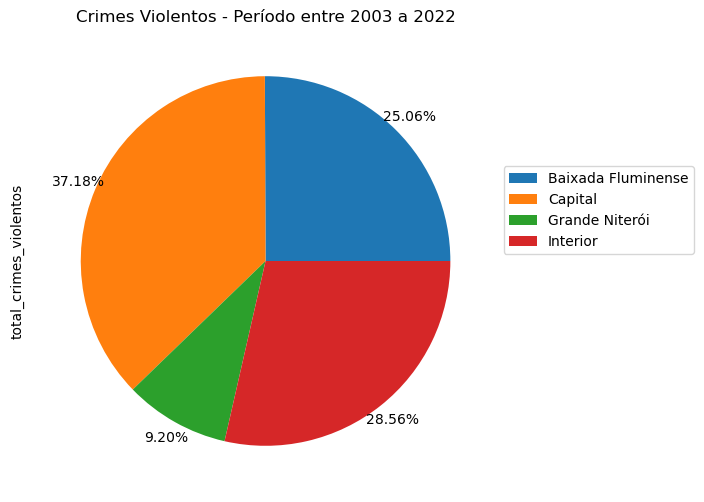

In [103]:
dtf_crimes_violentos = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'],
                         'total_crimes_violentos': dt_crimes_grafico['total_crimes_violentos']})
apx = dtf_crimes_violentos.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_crimes_violentos', 
                                       title='Crimes Violentos - Período entre 2003 a 2022', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Crimes de Furtos

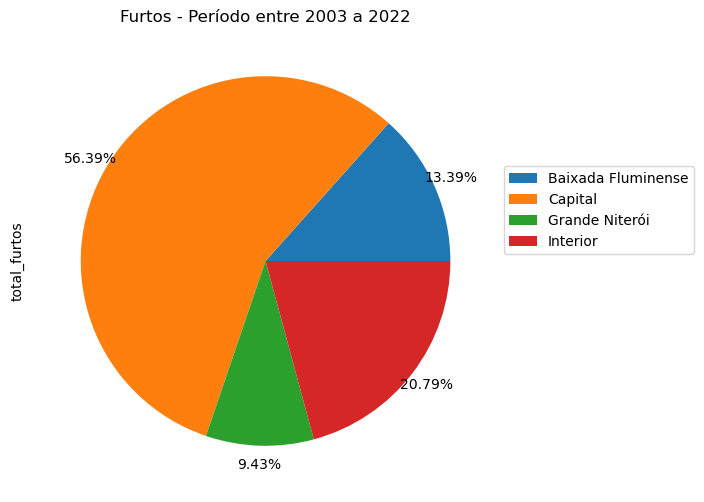

In [104]:
dt_furtos = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'total_furtos': dt_crimes_grafico['total_furtos']})
agx = dt_furtos.groupby(['regiao']).sum().plot(kind='pie', 
                                              y='total_furtos', 
                                              title='Furtos - Período entre 2003 a 2022', 
                                              figsize=(11,6), autopct="%1.2f%%",
                                              pctdistance=1.1, 
                                              legend = False, 
                                              labeldistance=None)
agx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Crimes Atividade Policial

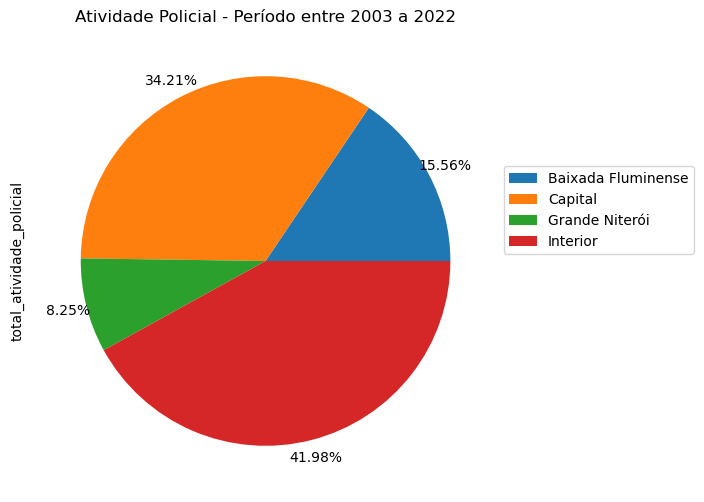

In [105]:
dt_atividade_policial = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'total_atividade_policial': dt_crimes_grafico['total_atividade_policial']})
afx = dt_atividade_policial.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total_atividade_policial', 
                                             title='Atividade Policial - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Roubos

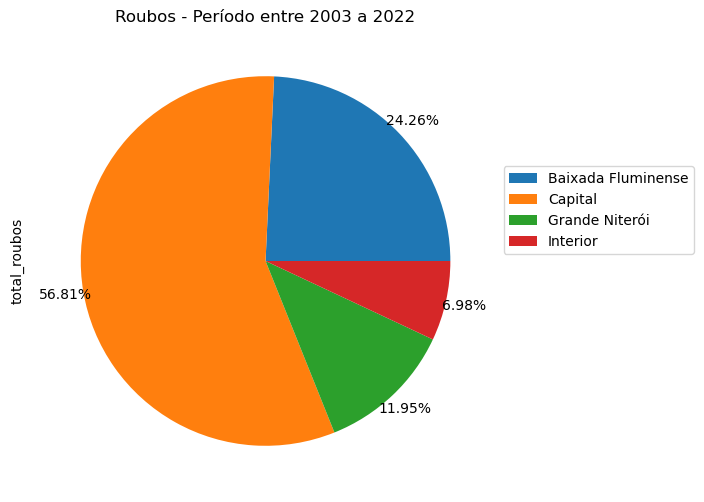

In [106]:
dt_roubos = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'total_roubos': dt_crimes_grafico['total_roubos']})
afx = dt_roubos.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total_roubos', 
                                             title='Roubos - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

#### Gráfico Crimes de Trânsito

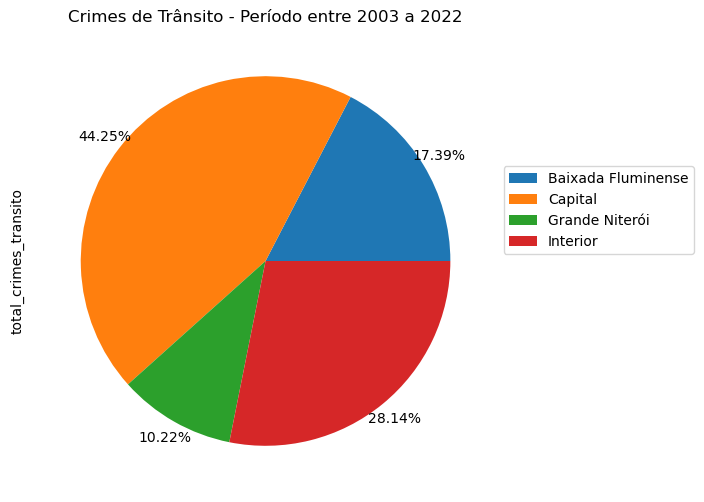

In [107]:
dt_crimes_transito = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'total_crimes_transito': dt_crimes_grafico['total_crimes_transito']})
afx = dt_crimes_transito.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total_crimes_transito', 
                                             title='Crimes de Trânsito - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Registro de Ocorrências

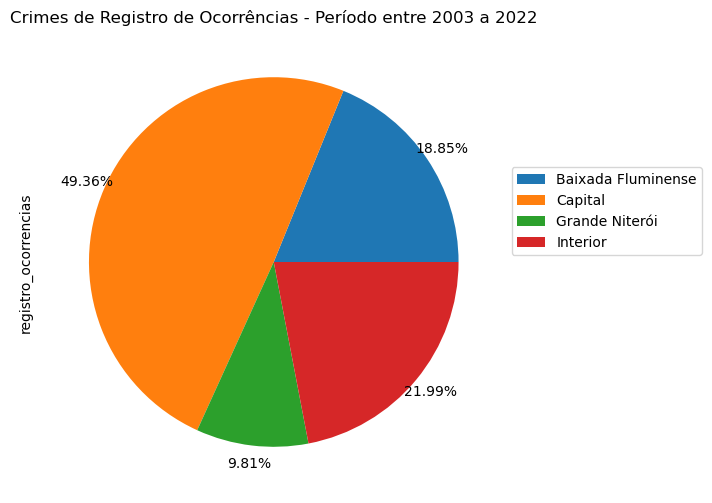

In [108]:
dt_registro_ocorrencias = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'registro_ocorrencias': dt_crimes_grafico['registro_ocorrencias']})
aro = dt_registro_ocorrencias.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='registro_ocorrencias', 
                                             title='Crimes de Registro de Ocorrências - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
aro.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Outros Registros

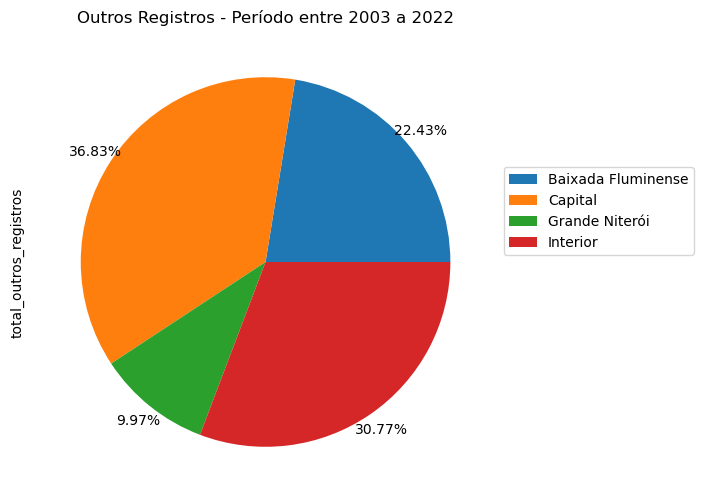

In [109]:
dt_outros_ocorrencias = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 'total_outros_registros': dt_crimes_grafico['total_outros_registros']})
aoo = dt_outros_ocorrencias.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total_outros_registros', 
                                             title='Outros Registros - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
aoo.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Crimes por Região

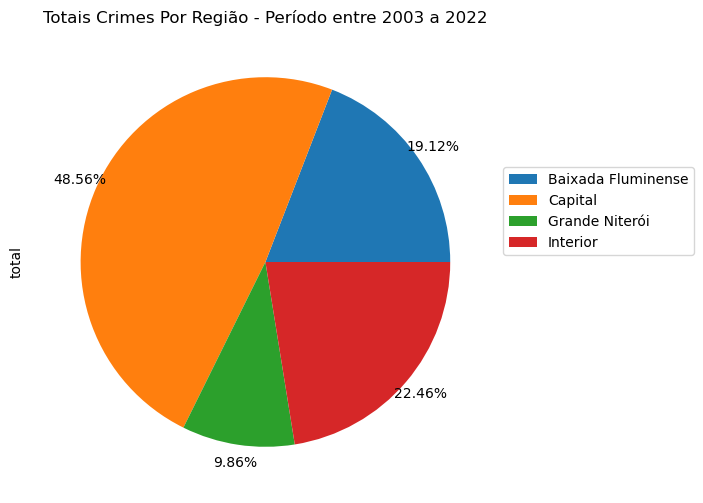

In [110]:
dt_crimes_totais = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 
                                 'total': (dt_crimes_grafico['total_crimes_transito'] 
                                           + dt_crimes_grafico['total_roubos'] 
                                           + dt_crimes_grafico['total_atividade_policial']
                                           + dt_crimes_grafico['total_crimes_patrimonio']
                                           + dt_crimes_grafico['total_furtos'] 
                                           + dt_crimes_grafico['total_outros_registros']
                                           + dt_crimes_grafico['registro_ocorrencias']
                                           + dt_crimes_grafico['total_crimes_violentos'])})
afx = dt_crimes_totais.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total', 
                                             title='Totais Crimes Por Região - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Crimes por Região

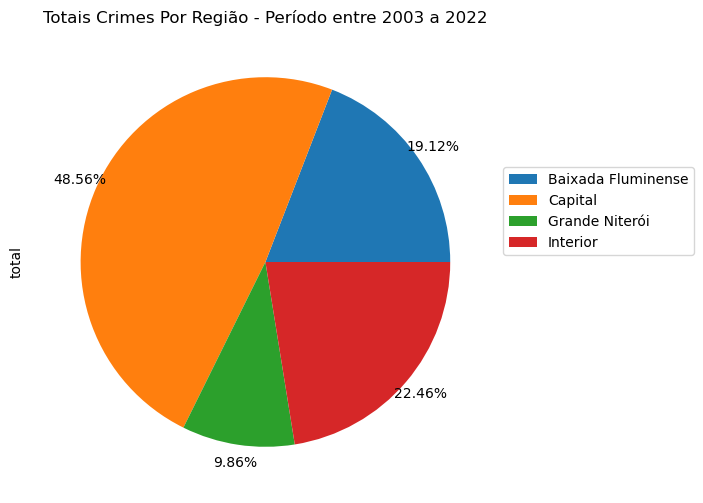

In [111]:
dt_crimes_totais = pd.DataFrame({'regiao': dt_crimes_grafico['regiao'], 
                                 'total': (dt_crimes_grafico['total_crimes_transito'] + 
                                           dt_crimes_grafico['total_roubos'] + 
                                           dt_crimes_grafico['total_atividade_policial'] + 
                                           dt_crimes_grafico['total_crimes_patrimonio'] +
                                           dt_crimes_grafico['total_outros_registros'] +
                                           dt_crimes_grafico['registro_ocorrencias'] +
                                           dt_crimes_grafico['total_furtos'] + 
                                           dt_crimes_grafico['total_crimes_violentos'])})
afx = dt_crimes_totais.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total', 
                                             title='Totais Crimes Por Região - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

In [112]:
relacao_cisp_aisp_risp = pd.read_excel('04 - Relacao_RISPxAISPxCISP.xls')
relacao_cisp_aisp_risp = relacao_cisp_aisp_risp.rename(columns={"RISP": "risp", 
                                                                "AISP":"aisp",
                                                                "CISP":"cisp",
                                                                "Unidade Territorial":"unidade_territorial",
                                                                "Município":"municipio",
                                                                "Região de Governo": "regiao_governo"})

In [113]:
relacao_cisp_aisp_risp

risp  aisp  cisp                                unidade_territorial  \
0       1     2     9  Catete, Cosme Velho, Flamengo, Glória e Laranj...   
1       1     2    10                           Botafogo, Humaitá e Urca   
2       1     3    23  Cachambi, Méier (parte) e Todos os Santos (parte)   
3       1     3    24  Abolição, Água Santa (parte), Encantado, Engen...   
4       1     3    25  Engenho Novo, Jacaré, Jacarezinho, Riachuelo, ...   
..    ...   ...   ...                                                ...   
142     7    38   107  Paraíba do Sul, Werneck, Salutaris e Inconfidê...   
143     7    38   108                                              Areal   
144     7    38   108          Comendador Levy Gasparian e Afonso Arinos   
145     7    38   108                               Três Rios e Bemposta   
146     7    38   109  Sapucaia, Anta, Pião, Nossa Senhora Aparecida ...   

                     municipio         regiao_governo  
0               Rio de Janeiro          Metropolitana  
1               Rio de Janeiro          Metropolitana  
2               Rio de Janeiro          Metropolitana  
3               Rio de Janeiro          Metropolitana  
4               Rio de Janeiro          Metropolitana  
..                         ...                    ...  
142             Paraíba do Sul  Centro-Sul Fluminense  
143                      Areal  Centro-Sul Fluminense  
144  Comendador Levy Gasparian  Centro-Sul Fluminense  
145                  Três Rios  Centro-Sul Fluminense  
146                   Sapucaia  Centro-Sul Fluminense  

[147 rows x 6 columns]

In [114]:
relacao_cisp_aisp_risp['cisp'].value_counts().where(relacao_cisp_aisp_risp['cisp'].value_counts() > 1).reset_index()

index  cisp
0      108   3.0
1       96   2.0
2      154   2.0
3      100   2.0
4      130   2.0
..     ...   ...
132     39   NaN
133     31   NaN
134     27   NaN
135     35   NaN
136    109   NaN

[137 rows x 2 columns]

In [115]:
df1 = relacao_cisp_aisp_risp.groupby('cisp').filter(lambda x: x['cisp'].count() > 1)
df1[{'cisp', 'municipio', 'unidade_territorial'}].reset_index()

index                  municipio  \
0      87             Miguel Pereira   
1      88            Paty do Alferes   
2     100                 Porto Real   
3     101                     Quatis   
4     109                 Natividade   
5     110                  Varre-Sai   
6     111                  Itaperuna   
7     112            São José de Ubá   
8     114                     Italva   
9     115            Cardoso Moreira   
10    120                  Carapebus   
11    121                   Quissamã   
12    123                    Aperibé   
13    124     Santo Antônio de Pádua   
14    131                   Cordeiro   
15    132                     Macuco   
16    143                      Areal   
17    144  Comendador Levy Gasparian   
18    145                  Três Rios   

                                  unidade_territorial  cisp  
0        Miguel Pereira, Governador Portela e Conrado    96  
1                            Paty do Alferes e Avelar    96  
2                                          Porto Real   100  
3            Quatis, Falcão e Ribeirão de São Joaquim   100  
4         Natividade, Ourania e Bom Jesus do Querendo   140  
5                                           Varre-Sai   140  
6   Itaperuna, Boaventura, Nossa Senhora da Penha,...   143  
7                                     São José de Ubá   143  
8                                              Italva   148  
9                       Cardoso Moreira e São Joaquim   148  
10  Centro, UB-S, Rodagem, Carapebus e Praia de Ca...   130  
11                                           Quissamã   130  
12                                            Aperibé   136  
13  Santo Antônio de Pádua, Campelo, Paraoquena, M...   136  
14                                           Cordeiro   154  
15                                             Macuco   154  
16                                              Areal   108  
17          Comendador Levy Gasparian e Afonso Arinos   108  
18                               Três Rios e Bemposta   108

In [116]:
# CRiação do Dataframe auxilir
df_cisp_munic = pd.DataFrame(columns={'cisp','munic','unidade_territorial'})
# Percorremos o dataframe inicial para averiguar as repetições
for index, row in df1.iterrows():
    # Se o reegistro com o codigo cip já existir no dataframe auxiliar então comncatenamos os valores
    # de unidade territorial e município
    if df_cisp_munic.loc[df_cisp_munic['cisp'] == row['cisp']]['cisp'].count() == 1:
        rowMunicDF = df_cisp_munic.loc[df_cisp_munic['cisp'] == row['cisp']]['munic'].values
        rowUTDF = df_cisp_munic.loc[df_cisp_munic['cisp'] == row['cisp']]['munic'].values
        print(rowMunicDF)
        df_cisp_munic.loc[df_cisp_munic['cisp'] == row['cisp'], 'unidade_territorial'] = rowUTDF + ", " + row['unidade_territorial']
        df_cisp_munic.loc[df_cisp_munic['cisp'] == row['cisp'], 'munic'] = rowMunicDF + ", " + row['municipio']
    # senão adicionamos no dataframe auxiliar
    else:
        df_cisp_munic = df_cisp_munic.append({'cisp': row['cisp'], 'munic':row['municipio'], 'unidade_territorial': row['unidade_territorial']}, ignore_index=True)      

['Miguel Pereira']
['Porto Real']
['Natividade']
['Itaperuna']
['Italva']
['Carapebus']
['Aperibé']
['Cordeiro']
['Areal']
['Areal, Comendador Levy Gasparian']


In [117]:
df_cisp_munic

unidade_territorial  \
0           Miguel Pereira, Paty do Alferes e Avelar   
1  Porto Real, Quatis, Falcão e Ribeirão de São J...   
2                              Natividade, Varre-Sai   
3                         Itaperuna, São José de Ubá   
4              Italva, Cardoso Moreira e São Joaquim   
5                                Carapebus, Quissamã   
6  Aperibé, Santo Antônio de Pádua, Campelo, Para...   
7                                   Cordeiro, Macuco   
8  Areal, Comendador Levy Gasparian, Três Rios e ...   

                                         munic cisp  
0              Miguel Pereira, Paty do Alferes   96  
1                           Porto Real, Quatis  100  
2                        Natividade, Varre-Sai  140  
3                   Itaperuna, São José de Ubá  143  
4                      Italva, Cardoso Moreira  148  
5                          Carapebus, Quissamã  130  
6              Aperibé, Santo Antônio de Pádua  136  
7                             Cordeiro, Macuco  154  
8  Areal, Comendador Levy Gasparian, Três Rios  108

In [118]:
df_qtd_maior_um = relacao_cisp_aisp_risp.groupby('cisp').filter(lambda x: x['cisp'].count() == 1)
df_qtd_maior_um[{'cisp', 'municipio', 'unidade_territorial'}].reset_index()

index       municipio                                unidade_territorial  \
0        0  Rio de Janeiro  Catete, Cosme Velho, Flamengo, Glória e Laranj...   
1        1  Rio de Janeiro                           Botafogo, Humaitá e Urca   
2        2  Rio de Janeiro  Cachambi, Méier (parte) e Todos os Santos (parte)   
3        3  Rio de Janeiro  Abolição, Água Santa (parte), Encantado, Engen...   
4        4  Rio de Janeiro  Engenho Novo, Jacaré, Jacarezinho, Riachuelo, ...   
..     ...             ...                                                ...   
123    139     Teresópolis  Teresópolis, Vale do Bonsucesso e Vale do Paqu...   
124    140       Sumidouro                                          Sumidouro   
125    141           Carmo     Carmo, Córrego da Prata e Porto Velho do Cunha   
126    142  Paraíba do Sul  Paraíba do Sul, Werneck, Salutaris e Inconfidê...   
127    146        Sapucaia  Sapucaia, Anta, Pião, Nossa Senhora Aparecida ...   

     cisp  
0       9  
1      10  
2      23  
3      24  
4      25  
..    ...  
123   110  
124   111  
125   112  
126   107  
127   109  

[128 rows x 4 columns]

In [119]:
for index, row in df_qtd_maior_um.iterrows():
       df_cisp_munic =  df_cisp_munic.append({'cisp': row['cisp'], 
                      'munic': row['municipio'], 
                      'unidade_territorial': row['unidade_territorial']}, ignore_index=True)

In [120]:
# Delegacia do Complexo do Alemão foi fechada em 2018
df_cisp_munic = df_cisp_munic.append({'cisp': 45, 
                                      'munic': 'Rio de Janeiro', 
                                      'unidade_territorial': 'Complexo do Alemão (extinta 2018)'},ignore_index=True)

In [121]:
df_cisp_munic

unidade_territorial  \
0             Miguel Pereira, Paty do Alferes e Avelar   
1    Porto Real, Quatis, Falcão e Ribeirão de São J...   
2                                Natividade, Varre-Sai   
3                           Itaperuna, São José de Ubá   
4                Italva, Cardoso Moreira e São Joaquim   
..                                                 ...   
133                                          Sumidouro   
134     Carmo, Córrego da Prata e Porto Velho do Cunha   
135  Paraíba do Sul, Werneck, Salutaris e Inconfidê...   
136  Sapucaia, Anta, Pião, Nossa Senhora Aparecida ...   
137                  Complexo do Alemão (extinta 2018)   

                               munic cisp  
0    Miguel Pereira, Paty do Alferes   96  
1                 Porto Real, Quatis  100  
2              Natividade, Varre-Sai  140  
3         Itaperuna, São José de Ubá  143  
4            Italva, Cardoso Moreira  148  
..                               ...  ...  
133                        Sumidouro  111  
134                            Carmo  112  
135                   Paraíba do Sul  107  
136                         Sapucaia  109  
137                   Rio de Janeiro   45  

[138 rows x 3 columns]

In [122]:
df_inner_cisp = pd.merge(df_crimes_armas[{'regiao', 'cisp', 'ano', 
                                          'total_roubos', 'total_furtos','total_crimes_violentos',
                                          'total_crimes_patrimonio','total_atividade_policial',
                                          'total_outros_registros','total_crimes_transito','registro_ocorrencias',
                                          'total_armas_fogo','total_armas_brancas','total_explosivo',
                                          'total_municao','total_simulacro'
                                          ''}], df_cisp_munic, on=['cisp'], how="inner")
df_inner_cisp

total_furtos  total_outros_registros  total_municao  total_simulacro  \
0              28.0                    29.0            0.0              0.0   
1              24.0                    20.0            0.0              0.0   
2              23.0                    35.0            0.0              0.0   
3              44.0                    39.0            0.0              0.0   
4              47.0                    29.0            0.0              0.0   
...             ...                     ...            ...              ...   
31966           7.0                     6.0            0.0              0.0   
31967           1.0                     4.0           11.0              0.0   
31968           7.0                    10.0            0.0              0.0   
31969           2.0                     9.0            0.0              0.0   
31970           2.0                    10.0            0.0              0.0   

       total_explosivo   ano  total_crimes_patrimonio  total_armas_fogo  \
0                  0.0  2003                      0.0               0.0   
1                  0.0  2003                      0.0               0.0   
2                  0.0  2003                      0.0               0.0   
3                  0.0  2003                      1.0               0.0   
4                  0.0  2003                      1.0               0.0   
...                ...   ...                      ...               ...   
31966              0.0  2022                      2.0               0.0   
31967              0.0  2022                      4.0               1.0   
31968              0.0  2022                      6.0               0.0   
31969              0.0  2022                      5.0               0.0   
31970              0.0  2022                      1.0               0.0   

       total_crimes_violentos  total_crimes_transito  registro_ocorrencias  \
0                        38.0                   13.0                 139.0   
1                        55.0                    8.0                 187.0   
2                        48.0                   15.0                 140.0   
3                        54.0                    5.0                 194.0   
4                        32.0                    8.0                 169.0   
...                       ...                    ...                   ...   
31966                     7.0                    3.0                  40.0   
31967                    15.0                    3.0                  38.0   
31968                     9.0                    1.0                  49.0   
31969                    12.0                    4.0                  40.0   
31970                     9.0                    0.0                  41.0   

       total_roubos cisp  total_armas_brancas              regiao  \
0              16.0   48                  0.0  Baixada Fluminense   
1              56.0   48                  0.0  Baixada Fluminense   
2              20.0   48                  0.0  Baixada Fluminense   
3              29.0   48                  0.0  Baixada Fluminense   
4              30.0   48                  0.0  Baixada Fluminense   
...             ...  ...                  ...                 ...   
31966           0.0  168                  0.0            Interior   
31967           0.0  168                  0.0            Interior   
31968           1.0  168                  1.0            Interior   
31969           2.0  168                  0.0            Interior   
31970           2.0  168                  0.0            Interior   

       total_atividade_policial  \
0                           4.0   
1                           7.0   
2                           5.0   
3                           7.0   
4                           4.0   
...                         ...   
31966                       6.0   
31967                       0.0   
31968                       2.0   
31969                       6.0   
31970 

In [123]:
df_inner_cisp.loc[df_inner_cisp['munic'].isnull()]['cisp'].values

array([], dtype=object)

In [124]:
# delegacias da região da Capital e as unidades territoriais
df_inner_cisp_capital = df_inner_cisp.query('regiao == "Capital"')
df_inner_cisp_capital
# Montagem do gráfico dos totais de crimes por delegacias da região da Capital.
df_graficos_cisp_capital = pd.DataFrame({'unidade_territorial': df_inner_cisp_capital['unidade_territorial'],
                                         'total': (df_inner_cisp_capital['total_crimes_transito'] + 
                                                   df_inner_cisp_capital['total_roubos'] + 
                                                   df_inner_cisp_capital['total_atividade_policial'] + 
                                                   df_inner_cisp_capital['total_crimes_patrimonio'] +
                                                   df_inner_cisp_capital['total_outros_registros'] +
                                                   df_inner_cisp_capital['registro_ocorrencias'] +
                                                   df_inner_cisp_capital['total_furtos'] + 
                                                   df_inner_cisp_capital['total_crimes_violentos'])})
# Apresentação do Gráfico
afx = df_graficos_cisp_capital.groupby(['unidade_territorial']).sum().reset_index()
# Criação do gráfico com 10 maiores registros de crimes por unidade territorial
fig = px.bar(afx.sort_values('total', ascending=False).head(10), 
             color="unidade_territorial", 
             x="total", 
             y="unidade_territorial",
             labels={'unidade_territorial': 'Unidades Territoriais'},
             title="As 10 maiores índices de violências nas unidades territoriais(delegacias) na região da Capital de 2003 a 2022",
width=1000, height=500)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [125]:
# delegacias da região Baixada Fluminense e as unidades territoriais
df_inner_cisp_baixada = df_inner_cisp.query('regiao == "Baixada Fluminense"')
df_inner_cisp_baixada
#Montagem do gráfico dos totais de crimes por delegacias da região Baixada Fluminense
df_graficos_cisp_baixada = pd.DataFrame({'unidade_territorial': df_inner_cisp_baixada['unidade_territorial'] + " (" + df_inner_cisp_baixada["munic"] + ")",
                                         'total': (df_inner_cisp_baixada['total_crimes_transito'] + 
                                                   df_inner_cisp_baixada['total_roubos'] + 
                                                   df_inner_cisp_baixada['total_atividade_policial'] + 
                                                   df_inner_cisp_baixada['total_crimes_patrimonio'] +
                                                   df_inner_cisp_baixada['total_outros_registros'] +
                                                   df_inner_cisp_baixada['registro_ocorrencias'] +
                                                   df_inner_cisp_baixada['total_furtos'] + 
                                                   df_inner_cisp_baixada['total_crimes_violentos'])})
# Apresentação do Gráfico
afx = df_graficos_cisp_baixada.groupby(['unidade_territorial']).sum().reset_index()
# Criação do gráfico com 10 maiores registros de crimes por unidade territorial
fig = px.bar(afx.sort_values('total', ascending=False).head(10), 
             color="unidade_territorial", 
             x="total", 
             y="unidade_territorial",
             labels={'unidade_territorial': 'Unidades Territoriais'},
             title="As 10 maiores índices de violências nas unidades territoriais(delegacias) na região da Baixada Fluminense de 2003 a 2022",
width=1000, height=500)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [126]:
# delegacias do Municipio da região Grande Niterói e as unidades territoriais
df_inner_cisp_grande_niteroi = df_inner_cisp.query('regiao == "Grande Niterói"')
df_inner_cisp_grande_niteroi
#Montagem do gráfico dos totais de crimes por delegacias da região Grande Niterói
df_graficos_cisp_grande_niteroi = pd.DataFrame({'unidade_territorial': df_inner_cisp_grande_niteroi['unidade_territorial'] + " (" + df_inner_cisp_grande_niteroi["munic"] + ")",
                                         'total': (df_inner_cisp_grande_niteroi['total_crimes_transito'] + 
                                                   df_inner_cisp_grande_niteroi['total_roubos'] + 
                                                   df_inner_cisp_grande_niteroi['total_atividade_policial'] + 
                                                   df_inner_cisp_grande_niteroi['total_crimes_patrimonio'] +
                                                   df_inner_cisp_grande_niteroi['total_outros_registros'] +
                                                   df_inner_cisp_grande_niteroi['registro_ocorrencias'] +
                                                   df_inner_cisp_grande_niteroi['total_furtos'] + 
                                                   df_inner_cisp_grande_niteroi['total_crimes_violentos'])})
#Apresentação do Gráfico
afx = df_graficos_cisp_grande_niteroi.groupby(['unidade_territorial']).sum().reset_index()
# Criação do gráfico com 10 maiores registros de crimes por unidade territorial
fig = px.bar(afx.sort_values('total', ascending=False).head(10), 
             color="unidade_territorial", 
             x="total", 
             y="unidade_territorial",
             labels={'unidade_territorial': 'Unidades Territoriais'},
             title="As 10 maiores índices de violências nas unidades territoriais(delegacias) na região da Grande Niterói de 2003 a 2022",
width=1000, height=500)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [127]:
# delegacias do Municipio da região do Interior e as unidades territoriais
df_inner_cisp_interior = df_inner_cisp.query('regiao == "Interior"')
df_inner_cisp_interior
#Montagem do gráfico dos totais de crimes por delegacias da região do Interior
df_graficos_cisp_interior = pd.DataFrame({'unidade_territorial': df_inner_cisp_interior['unidade_territorial'] + " (" + df_inner_cisp_interior["munic"] + ")",
                                         'total': (df_inner_cisp_interior['total_crimes_transito'] + 
                                                   df_inner_cisp_interior['total_roubos'] + 
                                                   df_inner_cisp_interior['total_atividade_policial'] + 
                                                   df_inner_cisp_interior['total_crimes_patrimonio'] +
                                                   df_inner_cisp_interior['total_outros_registros'] +
                                                   df_inner_cisp_interior['registro_ocorrencias'] +
                                                   df_inner_cisp_interior['total_furtos'] + 
                                                   df_inner_cisp_interior['total_crimes_violentos'])})
# Apresentação do Gráfico
afx = df_graficos_cisp_interior.groupby(['unidade_territorial']).sum().reset_index()
# Criação do gráfico com 10 maiores registros de crimes por unidade territorial
fig = px.bar(afx.sort_values('total', ascending=False).head(10), 
             color="unidade_territorial", 
             x="total", 
             y="unidade_territorial",
             labels={'unidade_territorial': 'Unidades Territoriais'},
             title="As 10 maiores índices de violências nas unidades territoriais(delegacias) na região do Interior de 2003 a 2022",
width=1000, height=500)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [128]:
df_graficos_cisp_capital.groupby(['unidade_territorial']).sum().reset_index()

unidade_territorial     total
0   Abolição, Água Santa (parte), Encantado, Engen...  209247.0
1   Acari, Barros Filho, Costa Barros, Parque Colú...  368575.0
2                  Alto da Boa Vista e Tijuca (parte)  292621.0
3   Anchieta, Guadalupe, Parque Anchieta e Ricardo...  190504.0
4                       Andaraí, Grajaú e Vila Isabel  279486.0
5   Anil, Cidade de Deus, Curicica, Gardênia Azul,...  527195.0
6   Bancários, Cacuia, Cidade Universitária, Cocot...  308928.0
7      Bangu, Gericinó, Padre Miguel e Senador Camará  621705.0
8                     Barra da Tijuca, Itanhangá, Joá  538900.0
9   Benfica, Bonsucesso, Higienópolis, Manguinhos,...  518338.0
10  Bento Ribeiro, Campinho, Marechal Hermes e Osw...  239978.0
11                           Botafogo, Humaitá e Urca  289414.0
12  Brás de Pina (parte), Cordovil, Jardim América...  321586.0
13  Brás de Pina (parte), Olaria, Penha e Penha Ci...  353524.0
14  Cachambi, Méier (parte) e Todos os Santos (parte)  299851.0
15     Caju, Mangueira, São Cristóvão e Vasco da Gama  297900.0
16  Campo Grande, Cosmos, Inhoaíba, Santíssimo e S...  745042.0
17  Campo dos Afonsos, Deodoro, Jardim Sulacap, Ma...  387004.0
18  Catete, Cosme Velho, Flamengo, Glória e Laranj...  296172.0
19  Catumbi, Cidade Nova, Estácio, Rio Comprido e ...  220561.0
20  Cavalcanti, Engenheiro Leal, Madureira, Turiaç...  391393.0
21                                     Centro (parte)  301731.0
22       Centro (parte), Gamboa, Santo Cristo e Saúde  299921.0
23                     Centro (parte), Lapa e Paquetá  460187.0
24  Coelho Neto, Colégio (parte), Honório Gurgel e...  241225.0
25  Colégio (parte), Irajá, Vicente de Carvalho, V...  377390.0
26                  Complexo do Alemão (extinta 2018)   10178.0
27                                 Copacabana (parte)  184050.0
28                          Copacabana (parte) e Leme  350035.0
29  Del Castilho, Engenho da Rainha, Inhaúma, Mari...  220740.0
30  Engenho Novo, Jacaré, Jacarezinho, Riachuelo, ...  261695.0
31  Freguesia (Jacarepaguá), Pechincha e Tanque (p...  230057.0
32           Guaratiba, Pedra de Guaratiba e Sepetiba  155106.0
33  Gávea, Jardim Botânico, Lagoa, São Conrado e V...  156120.0
34                                   Ipanema e Leblon  318465.0
35       Maracanã, Praça da Bandeira e Tijuca (parte)  246856.0
36                             Paciência e Santa Cruz  372185.0
37  Recreio dos Bandeirantes, Barra de Guaratiba, ...  214689.0
38                                            Rocinha   21838.0
39                                       Santa Teresa   76093.0
40        Vila Valqueire, Praça Seca e Tanque (parte)  241755.0
41  Água Santa (parte), Engenho de Dentro (parte),...  176627.0

In [129]:
afx = df_graficos_cisp_capital.groupby(['unidade_territorial']).sum().reset_index()
afx.sort_values('total', ascending=False).head(15)

unidade_territorial     total
16  Campo Grande, Cosmos, Inhoaíba, Santíssimo e S...  745042.0
7      Bangu, Gericinó, Padre Miguel e Senador Camará  621705.0
8                     Barra da Tijuca, Itanhangá, Joá  538900.0
5   Anil, Cidade de Deus, Curicica, Gardênia Azul,...  527195.0
9   Benfica, Bonsucesso, Higienópolis, Manguinhos,...  518338.0
23                     Centro (parte), Lapa e Paquetá  460187.0
20  Cavalcanti, Engenheiro Leal, Madureira, Turiaç...  391393.0
17  Campo dos Afonsos, Deodoro, Jardim Sulacap, Ma...  387004.0
25  Colégio (parte), Irajá, Vicente de Carvalho, V...  377390.0
36                             Paciência e Santa Cruz  372185.0
1   Acari, Barros Filho, Costa Barros, Parque Colú...  368575.0
13  Brás de Pina (parte), Olaria, Penha e Penha Ci...  353524.0
28                          Copacabana (parte) e Leme  350035.0
12  Brás de Pina (parte), Cordovil, Jardim América...  321586.0
34                                   Ipanema e Leblon  318465.0

In [130]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  total_simulacro  
0                      0.0              0.0            0.0              0.0  
1                      0.0              0.0            0.0              0.0  
2                      0.0              0.0            0.0              0.0  
3                      0.0              0.0            0.0              0.0  
4                      0.0              0.0            0.0              0.0  
...                    ...              ...            ...              ...  
31966                  0.0              0.0            0.0              0.0  
31967                  0.0              0.0           11.0              0.0  
31968        

In [131]:
df_crimes_armas.query('regiao == "Capital"').groupby(['cisp', 'regiao', 'munic'])[
                                                        'total_roubos', 
                                                        'total_furtos', 
                                                        'total_crimes_violentos', 
                                                        'total_crimes_patrimonio', 
                                                        'total_atividade_policial', 
                                                        'total_outros_registros', 
                                                        'total_crimes_transito', 
                                                        'registro_ocorrencias'].apply(lambda x : x.astype(float).sum()).reset_index()

cisp   regiao           munic  total_roubos  total_furtos  \
0      1  Capital  Rio de Janeiro       25284.0       59970.0   
1      4  Capital  Rio de Janeiro       32651.0       58807.0   
2      5  Capital  Rio de Janeiro       44694.0       95713.0   
3      6  Capital  Rio de Janeiro       26860.0       26787.0   
4      7  Capital  Rio de Janeiro       10989.0       10195.0   
5      9  Capital  Rio de Janeiro       32491.0       56509.0   
6     10  Capital  Rio de Janeiro       26890.0       60926.0   
7     11  Capital  Rio de Janeiro         397.0        1985.0   
8     12  Capital  Rio de Janeiro       19577.0       83454.0   
9     13  Capital  Rio de Janeiro       12165.0       40777.0   
10    14  Capital  Rio de Janeiro       22965.0       77009.0   
11    15  Capital  Rio de Janeiro       10731.0       26717.0   
12    16  Capital  Rio de Janeiro       38966.0      104860.0   
13    17  Capital  Rio de Janeiro       41679.0       39866.0   
14    18  Capital  Rio de Janeiro       36769.0       44125.0   
15    19  Capital  Rio de Janeiro       31532.0       48537.0   
16    20  Capital  Rio de Janeiro       36754.0       38633.0   
17    21  Capital  Rio de Janeiro       78642.0       52367.0   
18    22  Capital  Rio de Janeiro       56029.0       41688.0   
19    23  Capital  Rio de Janeiro       49074.0       45042.0   
20    24  Capital  Rio de Janeiro       39425.0       19396.0   
21    25  Capital  Rio de Janeiro       42637.0       26593.0   
22    26  Capital  Rio de Janeiro       28202.0       20264.0   
23    27  Capital  Rio de Janeiro       74565.0       40791.0   
24    28  Capital  Rio de Janeiro       37999.0       24355.0   
25    29  Capital  Rio de Janeiro       68538.0       54207.0   
26    30  Capital  Rio de Janeiro       40748.0       22721.0   
27    31  Capital  Rio de Janeiro       41819.0       12008.0   
28    32  Capital  Rio de Janeiro       43067.0       63651.0   
29    33  Capital  Rio de Janeiro       58699.0       35952.0   
30    34  Capital  Rio de Janeiro       96208.0       55298.0   
31    35  Capital  Rio de Janeiro       67756.0       83757.0   
32    36  Capital  Rio de Janeiro       25929.0       35079.0   
33    37  Capital  Rio de Janeiro       28794.0       44241.0   
34    38  Capital  Rio de Janeiro       58567.0       26534.0   
35    39  Capital  Rio de Janeiro       79755.0       22013.0   
36    40  Capital  Rio de Janeiro       56995.0       16738.0   
37    41  Capital  Rio de Janeiro       25634.0       28876.0   
38    42  Capital  Rio de Janeiro       13198.0       36398.0   
39    43  Capital  Rio de Janeiro        8530.0       13847.0   
40    44  Capital  Rio de Janeiro       44705.0       22667.0   
41    45  Capital  Rio de Janeiro         354.0         549.0   

    total_crimes_violentos  total_crimes_patrimonio  total_atividade_policial  \
0                   5322.0                  24644.0                   10392.0   
1                  10322.0                   5720.0                   18684.0   
2                  13607.0                  17411.0                   28703.0   
3                  14345.0                   5450.0                   12327.0   
4                   4988.0                   1166.0                    4217.0   
5                  10186.0                  12365.0                   12082.0   
6                   8523.0                  14924.0                    8719.0   
7                   2564.0                    759.0                    1699.0   
8                  11702.0                  14780.0                   19789.0   
9                   6450.0                   8321.0                   10134.0   
10                  7292.0                  13504.0                   18177.0   
11                  8453.0                   6509.0                    7367.0   
12                 21518.0                  28339.0                   18681.0   
13                 14197.0                   5103.0                   1952

In [132]:
df_crimes_armas.columns

Index(['regiao', 'cisp', 'munic', 'ano', 'mes', 'total_roubos', 'total_furtos',
       'total_crimes_violentos', 'total_crimes_patrimonio',
       'total_atividade_policial', 'total_outros_registros',
       'total_crimes_transito', 'registro_ocorrencias', 'total_armas_fogo',
       'total_armas_brancas', 'total_explosivo', 'total_municao',
       'total_simulacro'],
      dtype='object')

In [133]:
dt_crimes_grafico.columns[1:9].values

array(['total_roubos', 'total_furtos', 'total_crimes_violentos',
       'total_crimes_patrimonio', 'total_atividade_policial',
       'total_outros_registros', 'total_crimes_transito',
       'registro_ocorrencias'], dtype=object)

In [134]:
dt_crimes_grafico.iloc[:,1:9].sum()

total_roubos                 2846597.0
total_furtos                 3050244.0
total_crimes_violentos       1984623.0
total_crimes_patrimonio       719540.0
total_atividade_policial     1530832.0
total_outros_registros       1434720.0
total_crimes_transito         757962.0
registro_ocorrencias        13653847.0
dtype: float64

##### Totais de Crimes

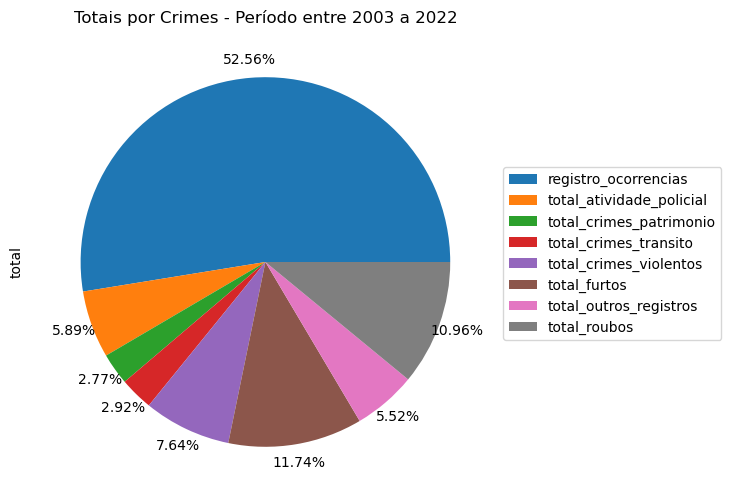

In [135]:
dt_totais_crimes = pd.DataFrame({'crimes': dt_crimes_grafico.columns[1:9].values, 
                                 'total': dt_crimes_grafico.iloc[:,1:9].sum().values})
afx = dt_totais_crimes.groupby(['crimes']).sum().plot(kind='pie', 
                                             y='total', 
                                             title='Totais por Crimes - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

#### Gráficos por Armas

In [136]:
dt_armas_graficos

regiao  total_armas_fogo  total_armas_brancas  total_explosivo  \
0  Baixada Fluminense           29016.0                735.0           2332.0   
1             Capital           42281.0               4838.0           7158.0   
2      Grande Niterói           13081.0                277.0           1052.0   
3            Interior           46482.0               1901.0           1740.0   

   total_municao  total_simulacro  
0       215881.0           1531.0  
1       550355.0           7152.0  
2        95007.0            999.0  
3       423859.0           1956.0

##### Gráfico de Armas de Fogo

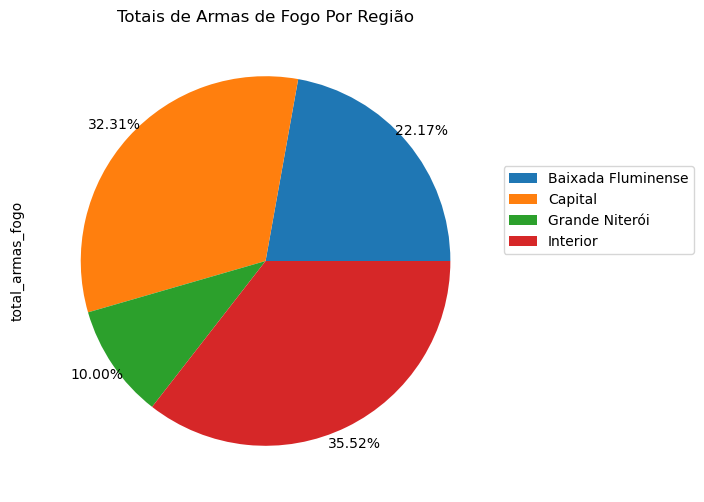

In [137]:
dtf_armas_fogo_grafico = pd.DataFrame({'regiao': dt_armas_graficos['regiao'],
                         'total_armas_fogo': dt_armas_graficos['total_armas_fogo']})
apx = dtf_armas_fogo_grafico.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_armas_fogo', 
                                       title='Totais de Armas de Fogo Por Região', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Armas Brancas

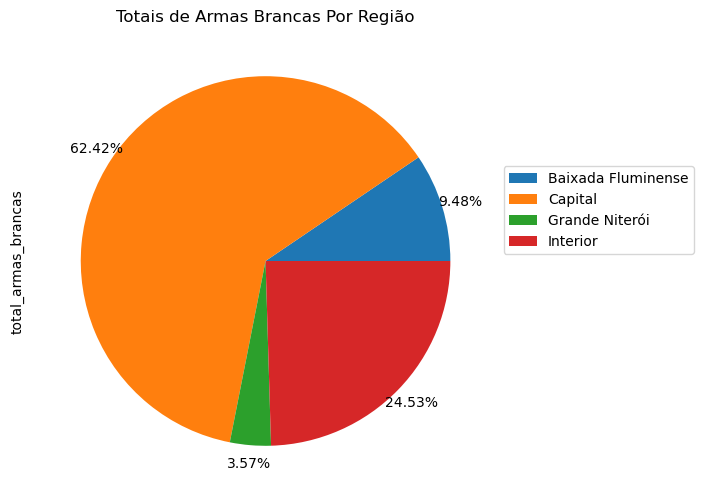

In [138]:
dtf_armas_brancas_grafico = pd.DataFrame({'regiao': dt_armas_graficos['regiao'],
                         'total_armas_brancas': dt_armas_graficos['total_armas_brancas']})
apx = dtf_armas_brancas_grafico.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_armas_brancas', 
                                       title='Totais de Armas Brancas Por Região', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Explosivos

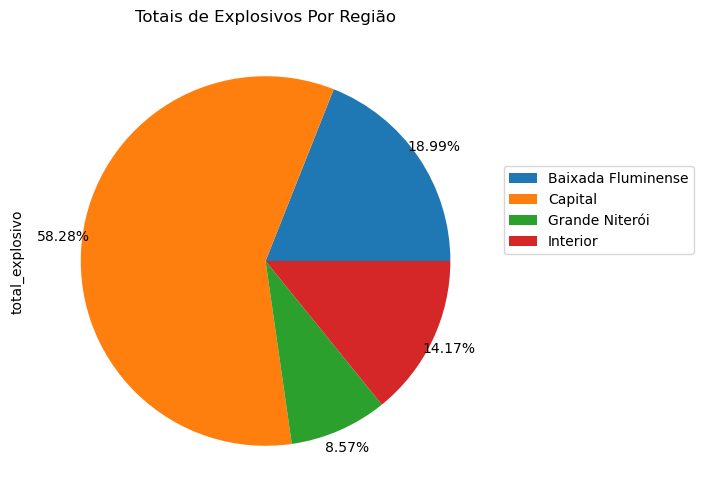

In [139]:
dtf_explosivo_grafico = pd.DataFrame({'regiao': dt_armas_graficos['regiao'],
                         'total_explosivo': dt_armas_graficos['total_explosivo']})
apx = dtf_explosivo_grafico.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_explosivo', 
                                       title='Totais de Explosivos Por Região', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Munições

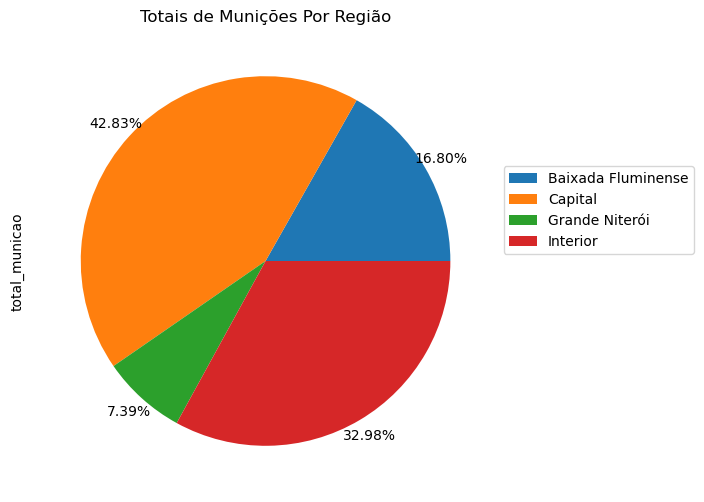

In [140]:
dtf_municao_grafico = pd.DataFrame({'regiao': dt_armas_graficos['regiao'],
                         'total_municao': dt_armas_graficos['total_municao']})
apx = dtf_municao_grafico.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_municao', 
                                       title='Totais de Munições Por Região', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

##### Gráfico de Simulacros

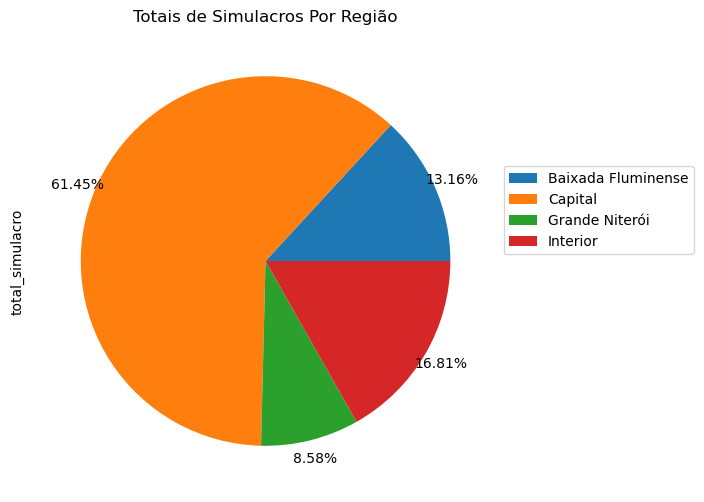

In [141]:
dtf_simulacro_grafico = pd.DataFrame({'regiao': dt_armas_graficos['regiao'],
                         'total_simulacro': dt_armas_graficos['total_simulacro']})
apx = dtf_simulacro_grafico.groupby(['regiao']).sum().plot(kind='pie', 
                                       y='total_simulacro', 
                                       title='Totais de Simulacros Por Região', 
                                       figsize=(11,6), autopct="%1.2f%%",
                                       pctdistance=1.1, 
                                       legend = False, 
                                       labeldistance=None)
apx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

#### Gráfico de Totais de Armas Apreendidas por Região

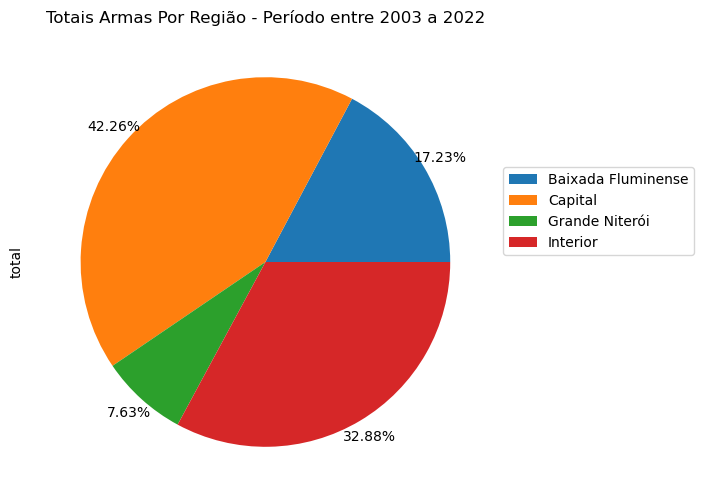

In [142]:
dt_armas_totais = pd.DataFrame({'regiao': dt_armas_graficos['regiao'], 
                                 'total': (dt_armas_graficos['total_armas_fogo'] + 
                                           dt_armas_graficos['total_armas_brancas'] + 
                                           dt_armas_graficos['total_explosivo'] + 
                                           dt_armas_graficos['total_municao'] +
                                           dt_armas_graficos['total_simulacro'])})
afx = dt_armas_totais.groupby(['regiao']).sum().plot(kind='pie', 
                                             y='total', 
                                             title='Totais Armas Por Região - Período entre 2003 a 2022', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

In [143]:
dt_armas_graficos.columns[1:6]

Index(['total_armas_fogo', 'total_armas_brancas', 'total_explosivo',
       'total_municao', 'total_simulacro'],
      dtype='object')

In [144]:
dt_armas_graficos.iloc[:,1:6].sum()

total_armas_fogo        130860.0
total_armas_brancas       7751.0
total_explosivo          12282.0
total_municao          1285102.0
total_simulacro          11638.0
dtype: float64

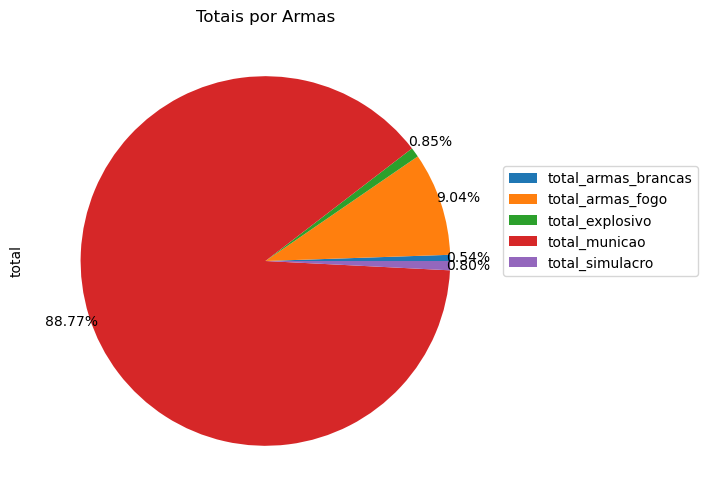

In [145]:
dt_totais_armas = pd.DataFrame({'armas': dt_armas_graficos.columns[1:6].values, 
                                 'total': dt_armas_graficos.iloc[:,1:6].sum().values})
afx = dt_totais_armas.groupby(['armas']).sum().plot(kind='pie', 
                                             y='total', 
                                             title='Totais por Armas', 
                                             figsize=(11,6), 
                                             autopct="%1.2f%%",
                                             pctdistance=1.1, 
                                             legend = False, 
                                             labeldistance=None)
afx.legend(bbox_to_anchor=(1, 0.72), loc='upper left')
plt.show()

### 3 - Relatórios Anuais

In [146]:
df_crimes_armas.columns

Index(['regiao', 'cisp', 'munic', 'ano', 'mes', 'total_roubos', 'total_furtos',
       'total_crimes_violentos', 'total_crimes_patrimonio',
       'total_atividade_policial', 'total_outros_registros',
       'total_crimes_transito', 'registro_ocorrencias', 'total_armas_fogo',
       'total_armas_brancas', 'total_explosivo', 'total_municao',
       'total_simulacro'],
      dtype='object')

In [147]:
df_crimes_armas_hist_int = pd.DataFrame({'ano': df_crimes_armas['ano'],
                                     'regiao': df_crimes_armas['regiao'],
                                     'total': (df_crimes_armas['total_roubos'] +
                                               df_crimes_armas['total_furtos'] +
                                               df_crimes_armas['total_crimes_violentos'] +
                                               df_crimes_armas['total_crimes_patrimonio'] +
                                               df_crimes_armas['total_atividade_policial'] +
                                               df_crimes_armas['total_outros_registros'] +
                                               df_crimes_armas['total_crimes_transito'] + 
                                               df_crimes_armas['registro_ocorrencias'])})
afxint = df_crimes_armas_hist_int.query("regiao=='Interior'").groupby(['ano', 'regiao']).sum().reset_index()
fig = px.bar(afxint.sort_values('total', ascending=False), 
             color="ano", 
             x="ano", 
             y="total",
             title="Os anos com maiores crimes na região da Interior entre 2003 a 2022",
width=1000, height=600)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [148]:
df_crimes_armas_hist_baixada = pd.DataFrame({'ano': df_crimes_armas['ano'],
                                     'regiao': df_crimes_armas['regiao'],
                                     'total': (df_crimes_armas['total_roubos'] +
                                               df_crimes_armas['total_furtos'] +
                                               df_crimes_armas['total_crimes_violentos'] +
                                               df_crimes_armas['total_crimes_patrimonio'] +
                                               df_crimes_armas['total_atividade_policial'] +
                                               df_crimes_armas['total_outros_registros'] +
                                               df_crimes_armas['total_crimes_transito'] + 
                                               df_crimes_armas['registro_ocorrencias'])})
afx_baixada = df_crimes_armas_hist_baixada.query("regiao=='Baixada Fluminense'").groupby(['ano', 'regiao']).sum().reset_index()
fig = px.bar(afx_baixada.sort_values('total', ascending=False), 
             color="ano", 
             x="ano", 
             y="total",
             title="Os anos com maiores crimes na região da Baixada Fluminense entre 2003 a 2022",
width=1000, height=600)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [149]:
df_crimes_armas_hist_capital = pd.DataFrame({'ano': df_crimes_armas['ano'],
                                     'regiao': df_crimes_armas['regiao'],
                                     'total': (df_crimes_armas['total_roubos'] + df_crimes_armas['total_furtos'] +
                                               df_crimes_armas['total_crimes_violentos'] + df_crimes_armas['total_crimes_patrimonio'] +
                                               df_crimes_armas['total_atividade_policial'] + df_crimes_armas['total_outros_registros'] +
                                               df_crimes_armas['total_crimes_transito'] + df_crimes_armas['registro_ocorrencias'])})
afx_capital = df_crimes_armas_hist_capital.query("regiao=='Capital'").groupby(['ano', 'regiao']).sum().reset_index()
fig = px.bar(afx_capital.sort_values('total', ascending=False), 
             color="ano", 
             x="ano", 
             y="total",
             title="Os anos com maiores crimes na região da Capital entre 2003 a 2022",
width=1000, height=600)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

In [150]:
df_crimes_armas_hist_grande_nit = pd.DataFrame({'ano': df_crimes_armas['ano'],
'regiao': df_crimes_armas['regiao'],
'total': (df_crimes_armas['total_roubos'] + df_crimes_armas['total_furtos'] +
df_crimes_armas['total_crimes_violentos'] + df_crimes_armas['total_crimes_patrimonio'] +
df_crimes_armas['total_atividade_policial'] + df_crimes_armas['total_outros_registros'] +
df_crimes_armas['total_crimes_transito'] + df_crimes_armas['registro_ocorrencias'])})
afx_grande_nit = df_crimes_armas_hist_grande_nit.query("regiao=='Grande Niterói'").groupby(['ano', 'regiao']).sum().reset_index()
fig = px.bar(afx_grande_nit.sort_values('total', ascending=False), 
             color="ano", 
             x="ano", 
             y="total",
             title="Os anos com maiores crimes na região da Grande Niterói entre 2003 a 2022",
width=1000, height=600)
fig.update_layout(yaxis_visible=False,legend=dict(yanchor="top", y=-0.1, xanchor="left", x=-0.01),title_font_size=14)
fig.show()

### 4 - Criando os atributos previsores e classe

In [151]:
type(df_crimes_armas)

pandas.core.frame.DataFrame

In [152]:
df_crimes_armas

regiao  cisp       munic   ano  mes  total_roubos  \
0      Baixada Fluminense    48  Seropédica  2003    1          16.0   
1      Baixada Fluminense    48  Seropédica  2003    2          56.0   
2      Baixada Fluminense    48  Seropédica  2003    3          20.0   
3      Baixada Fluminense    48  Seropédica  2003    4          29.0   
4      Baixada Fluminense    48  Seropédica  2003    5          30.0   
...                   ...   ...         ...   ...  ...           ...   
31966            Interior   168   Rio Claro  2022    6           0.0   
31967            Interior   168   Rio Claro  2022    7           0.0   
31968            Interior   168   Rio Claro  2022    8           1.0   
31969            Interior   168   Rio Claro  2022    9           2.0   
31970            Interior   168   Rio Claro  2022   10           2.0   

       total_furtos  total_crimes_violentos  total_crimes_patrimonio  \
0              28.0                    38.0                      0.0   
1              24.0                    55.0                      0.0   
2              23.0                    48.0                      0.0   
3              44.0                    54.0                      1.0   
4              47.0                    32.0                      1.0   
...             ...                     ...                      ...   
31966           7.0                     7.0                      2.0   
31967           1.0                    15.0                      4.0   
31968           7.0                     9.0                      6.0   
31969           2.0                    12.0                      5.0   
31970           2.0                     9.0                      1.0   

       total_atividade_policial  total_outros_registros  \
0                           4.0                    29.0   
1                           7.0                    20.0   
2                           5.0                    35.0   
3                           7.0                    39.0   
4                           4.0                    29.0   
...                         ...                     ...   
31966                       6.0                     6.0   
31967                       0.0                     4.0   
31968                       2.0                    10.0   
31969                       6.0                     9.0   
31970                       5.0                    10.0   

       total_crimes_transito  registro_ocorrencias  total_armas_fogo  \
0                       13.0                 139.0               0.0   
1                        8.0                 187.0               0.0   
2                       15.0                 140.0               0.0   
3                        5.0                 194.0               0.0   
4                        8.0                 169.0               0.0   
...                      ...                   ...               ...   
31966                    3.0                  40.0               0.0   
31967                    3.0                  38.0               1.0   
31968                    1.0                  49.0               0.0   
31969                    4.0                  40.0               0.0   
31970                    0.0                  41.0               0.0   

       total_armas_brancas  total_explosivo  total_municao  total_simulacro  
0                      0.0              0.0            0.0              0.0  
1                      0.0              0.0            0.0              0.0  
2                      0.0              0.0            0.0              0.0  
3                      0.0              0.0            0.0              0.0  
4                      0.0              0.0            0.0              0.0  
...                    ...              ...            ...              ...  
31966                  0.0              0.0            0.0              0.0  
31967                  0.0              0.0           11.0              0.0  
31968        

In [153]:
# Importação da biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [154]:
label_encoder_munic = LabelEncoder()

In [155]:
# Atributos previsores
x_crimes = df_crimes_armas.iloc[:,1:17].values

In [156]:
# Transformacao da coluna "munic" para int conforme é solicitado para ser realiuzado a previsão
x_crimes[:,1] = label_encoder_munic.fit_transform(x_crimes[:,1])

In [157]:
# atributo de classe
y_crimes = df_crimes_armas.iloc[:,0].values

In [158]:
np.unique(y_crimes)

array(['Baixada Fluminense', 'Capital', 'Grande Niterói', 'Interior'],
      dtype=object)

#### 4.1 - Gravando valores no arquivo pkl

In [159]:
#salvando os atributos de previsao e de classe
import pickle
with open('crimes.pkl', 'wb') as f:
  pickle.dump([x_crimes, y_crimes], f)

#### 4.2 - Criando os algorítmos de treibnamento

In [160]:
# importação das variáveis para efetuar os testes e treinamentos
from sklearn.model_selection import train_test_split

In [161]:
x_crimes_treinamento, x_crimes_teste, y_crimes_treinamento, y_crimes_teste = train_test_split(x_crimes, y_crimes, test_size = 0.25, random_state = 0)

In [162]:
x_crimes_treinamento.shape, y_crimes_treinamento.shape

((23978, 16), (23978,))

In [163]:
x_crimes_teste.shape, y_crimes_teste.shape

((7993, 16), (7993,))

In [164]:
# salvando as variáveius de teste e de treinamento
import pickle
with open('crimes_treinamento_teste.pkl', mode = 'wb') as f:
  pickle.dump([x_crimes_treinamento, y_crimes_treinamento, x_crimes_teste, y_crimes_teste], f)

### 5 - Criando dos algorítmos

#### 5.1 - Naïve Bayes - 91,81%

In [165]:
from sklearn.naive_bayes import GaussianNB

In [166]:
naive_crimes = GaussianNB()

In [167]:
naive_crimes.fit(x_crimes, y_crimes)

GaussianNB()

In [168]:
df_crimes_armas.iloc[211]

regiao                      Baixada Fluminense
cisp                                        48
munic                               Seropédica
ano                                       2020
mes                                          8
total_roubos                              22.0
total_furtos                              30.0
total_crimes_violentos                    30.0
total_crimes_patrimonio                   10.0
total_atividade_policial                  19.0
total_outros_registros                    23.0
total_crimes_transito                     10.0
registro_ocorrencias                     187.0
total_armas_fogo                           0.0
total_armas_brancas                        0.0
total_explosivo                            0.0
total_municao                              0.0
total_simulacro                            0.0
Name: 211, dtype: object

In [169]:
y_crimes[211]

'Baixada Fluminense'

In [170]:
x_crimes[211]

array([48, 73, 2020, 8, 22.0, 30.0, 30.0, 10.0, 19.0, 23.0, 10.0, 187.0,
       0.0, 0.0, 0.0, 0.0], dtype=object)

In [171]:
previsao = naive_crimes.predict([x_crimes[211]])

In [172]:
previsao

array(['Interior'], dtype='<U18')

In [173]:
# Biblioteca a ser importada para implementar o Naïve Bayes
from sklearn.naive_bayes import GaussianNB
naive_crimes = GaussianNB()
# Realiza o treinamento
naive_crimes.fit(x_crimes_treinamento, y_crimes_treinamento)
# Saída do atributo de classe da previsão
previsoes = naive_crimes.predict(x_crimes_teste)
previsoes

array(['Interior', 'Capital', 'Capital', ..., 'Interior', 'Interior',
       'Capital'], dtype='<U18')

In [174]:
y_crimes_teste

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [176]:
accuracy_score(y_crimes_teste, previsoes)

0.9181784061053422

In [177]:
# Na horizonta é verdadeiro negativo VN (é da classse mas nãpoi atribuido a elke)
# na vertical é Falso Positivo FP não pertence a classe mas foi atribuído a ele
# precisão = 3827 % (3827 + 382 + 17 + 145 = 544) = 4371 = 3827 / 4371 = 0,8755 = 
# acuária = total de acertos (679 + 2404 + 429 + 3827 = 7339) / (total de acertos + FN 7339 + 654) => 7339 / 7993 = 0,9181784
# No caso da acuária o VN não entra na conta pois ele é atribuído a classe incorreta mas consta no algoritmo por isso 

0.9181784061053422

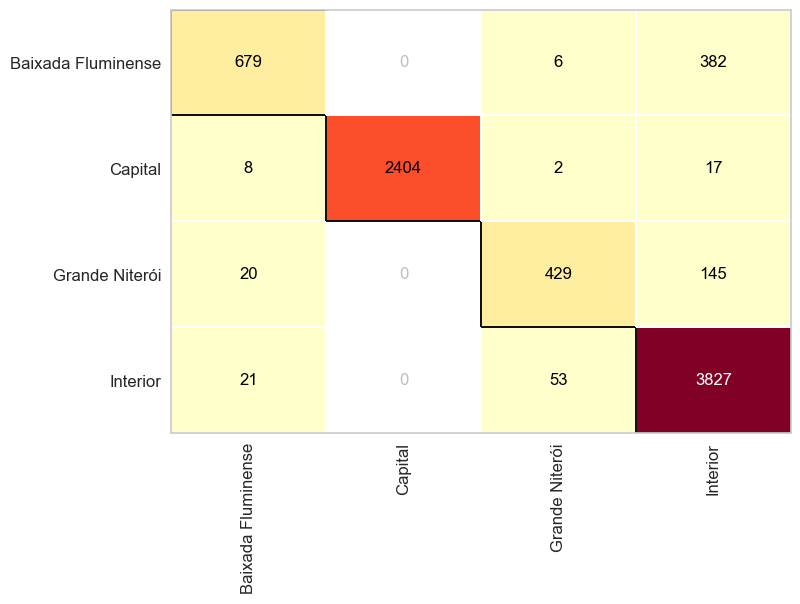

In [178]:
cm = ConfusionMatrix(naive_crimes)
cm.fit(x_crimes_treinamento, y_crimes_treinamento)
cm.score(x_crimes_teste, y_crimes_teste)

In [179]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc = nbc.fit(x_crimes_treinamento, y_crimes_treinamento)
print("Acurácia: ", nbc.score(x_crimes_treinamento, y_crimes_treinamento))
tp_nbc = nbc.predict(x_crimes_teste)
print("Acurácia de Previsão: ", accuracy_score(y_crimes_teste, tp_nbc))
print(classification_report(y_crimes_teste, tp_nbc))

Acurácia:  0.9135457502710819
Acurácia de Previsão:  0.9181784061053422
                    precision    recall  f1-score   support

Baixada Fluminense       0.93      0.64      0.76      1067
           Capital       1.00      0.99      0.99      2431
    Grande Niterói       0.88      0.72      0.79       594
          Interior       0.88      0.98      0.93      3901

          accuracy                           0.92      7993
         macro avg       0.92      0.83      0.87      7993
      weighted avg       0.92      0.92      0.91      7993



In [180]:
# Dataframe onde será apresentados os resultados
df_resultados = pd.DataFrame(columns={"regiao": "", 
                                      "acuracia": 0, 
                                      "precisao" : 0, 
                                      "revocacao": 0, 
                                      "f1-score": 0, 
                                      "algoritmo": ""})
#df_resultados = df_resultados.append({"regiao": "initial"}, ignore_index=True)

In [181]:
# Criação da função auxiliar que irá armazennar os valores de acurácia, previsão, revocação e f1-score
def append_df_resultado(lista, df, acuracia, algoritmo):    
        regiao =  ""
        precisao = 0
        revocacao = 0
        f1score = 0
     
        for (index, item) in enumerate(lista):
            if(index <= 3):

                regiao = item[0]
                lItems = list(list(lista[index])[1].values())
                for (i,litem) in enumerate(lItems):
                    if i == 0:
                        precisao = litem
                    elif i == 1:
                        revocacao = litem
                    elif i == 2:
                        f1score = litem
                      
                df = df.append({"regiao": regiao, 
                                "precisao": precisao, 
                                "revocacao": revocacao, 
                                "f1-score": f1score, 
                                "acuracia": acuracia,
                                "algoritmo": algoritmo}, ignore_index=True) 
               
        
        return df

In [182]:
report = classification_report(y_crimes_teste, tp_nbc, output_dict=True)

In [183]:
acuracia = accuracy_score(y_crimes_teste, tp_nbc)
df_resultados = df_resultados.append(append_df_resultado(list(report.items()), 
                                                         df_resultados, 
                                                         acuracia, 
                                                         "Naïve Bayes"), ignore_index=True)


In [184]:
df_resultados.drop_duplicates().reset_index(drop=True)

regiao  acuracia  precisao  revocacao  f1-score    algoritmo
0  Baixada Fluminense  0.918178  0.932692   0.636364  0.756546  Naïve Bayes
1             Capital  0.918178  1.000000   0.988893  0.994416  Naïve Bayes
2      Grande Niterói  0.918178  0.875510   0.722222  0.791513  Naïve Bayes
3            Interior  0.918178  0.875543   0.981031  0.925290  Naïve Bayes

#### 5.2 - Árvore de Descisão 100%

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
import pickle
with open('crimes.pkl', 'rb') as f:
  x_crimes, y_crimes = pickle.load(f)

In [187]:
with open('crimes_treinamento_teste.pkl', 'rb') as f:  
  x_crimes_treinamento, y_crimes_treinamento, x_crimes_teste, y_crimes_teste = pickle.load(f)

In [188]:
x_crimes_treinamento.shape, y_crimes_treinamento.shape

((23978, 16), (23978,))

In [189]:
x_crimes_teste.shape, y_crimes_teste.shape

((7993, 16), (7993,))

In [190]:
from sklearn.tree import DecisionTreeClassifier
arvore_crimes = DecisionTreeClassifier(criterion='entropy')

In [191]:
arvore_crimes.fit(x_crimes_treinamento, y_crimes_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [192]:
arvore_crimes.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [193]:
arvore_crimes.classes_

array(['Baixada Fluminense', 'Capital', 'Grande Niterói', 'Interior'],
      dtype=object)

In [194]:
previsoes = arvore_crimes.predict(x_crimes_teste)
previsoes

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [195]:
y_crimes_teste

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [197]:
accuracy_score(y_crimes_teste, previsoes)

1.0

1.0

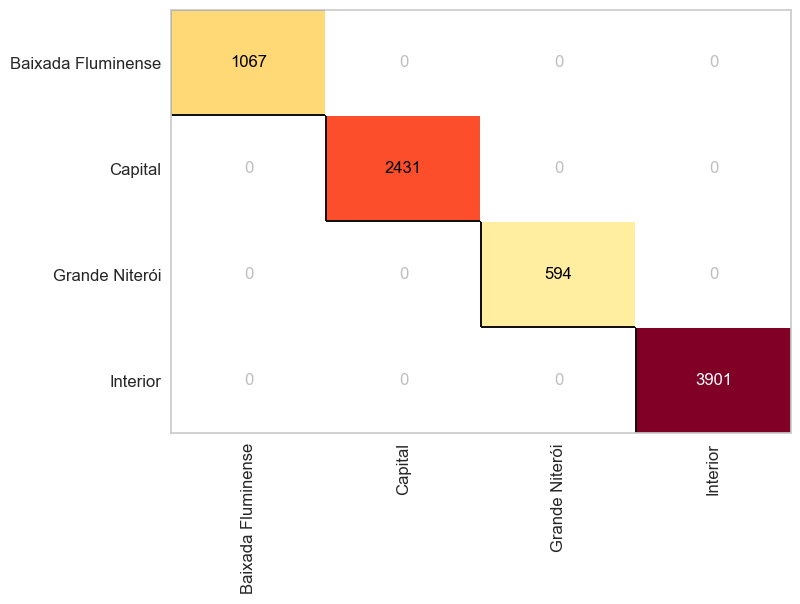

In [198]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_crimes)
cm.fit(x_crimes_treinamento, y_crimes_treinamento)
cm.score(x_crimes_teste, y_crimes_teste)

In [199]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(random_state=0)
dc = dc.fit(x_crimes_treinamento, y_crimes_treinamento)
print("Acurácia: ", dc.score(x_crimes_treinamento, y_crimes_treinamento))
tp_nbc = dc.predict(x_crimes_teste)
print("Acurácia de Previsão: ", accuracy_score(y_crimes_teste, tp_nbc))
print(classification_report(y_crimes_teste, tp_nbc))

Acurácia:  1.0
Acurácia de Previsão:  1.0
                    precision    recall  f1-score   support

Baixada Fluminense       1.00      1.00      1.00      1067
           Capital       1.00      1.00      1.00      2431
    Grande Niterói       1.00      1.00      1.00       594
          Interior       1.00      1.00      1.00      3901

          accuracy                           1.00      7993
         macro avg       1.00      1.00      1.00      7993
      weighted avg       1.00      1.00      1.00      7993



In [200]:
report = classification_report(y_crimes_teste, tp_nbc, output_dict=True)

In [201]:
acuracia = accuracy_score(y_crimes_teste, tp_nbc)

In [202]:
df_resultados = df_resultados.append(append_df_resultado(list(report.items()), 
                                                         df_resultados, 
                                                         acuracia, 
                                                         "Árvore de Descisão"), ignore_index=True)

In [203]:
df_resultados = df_resultados.drop_duplicates()
df_resultados

regiao  acuracia  precisao  revocacao  f1-score  \
0   Baixada Fluminense  0.918178  0.932692   0.636364  0.756546   
1              Capital  0.918178  1.000000   0.988893  0.994416   
2       Grande Niterói  0.918178  0.875510   0.722222  0.791513   
3             Interior  0.918178  0.875543   0.981031  0.925290   
8   Baixada Fluminense  1.000000  1.000000   1.000000  1.000000   
9              Capital  1.000000  1.000000   1.000000  1.000000   
10      Grande Niterói  1.000000  1.000000   1.000000  1.000000   
11            Interior  1.000000  1.000000   1.000000  1.000000   

             algoritmo  
0          Naïve Bayes  
1          Naïve Bayes  
2          Naïve Bayes  
3          Naïve Bayes  
8   Árvore de Descisão  
9   Árvore de Descisão  
10  Árvore de Descisão  
11  Árvore de Descisão

#### 5.3 - Random Forest - 99,98%

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
import pickle
with open('crimes.pkl', 'rb') as f:
  x_crimes, y_crimes = pickle.load(f)

In [206]:
with open('crimes_treinamento_teste.pkl', 'rb') as f:  
  x_crimes_treinamento, y_crimes_treinamento, x_crimes_teste, y_crimes_teste = pickle.load(f)

In [207]:
x_crimes_treinamento.shape, y_crimes_treinamento.shape

((23978, 16), (23978,))

In [208]:
x_crimes_teste.shape, y_crimes_teste.shape

((7993, 16), (7993,))

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [210]:
random_forest_crimes = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_crimes.fit(x_crimes_treinamento, y_crimes_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [211]:
previsoes = random_forest_crimes.predict(x_crimes_teste)
previsoes

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [212]:
y_crimes_teste

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [213]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_crimes_teste, previsoes)

0.9998748905292131

0.9998748905292131

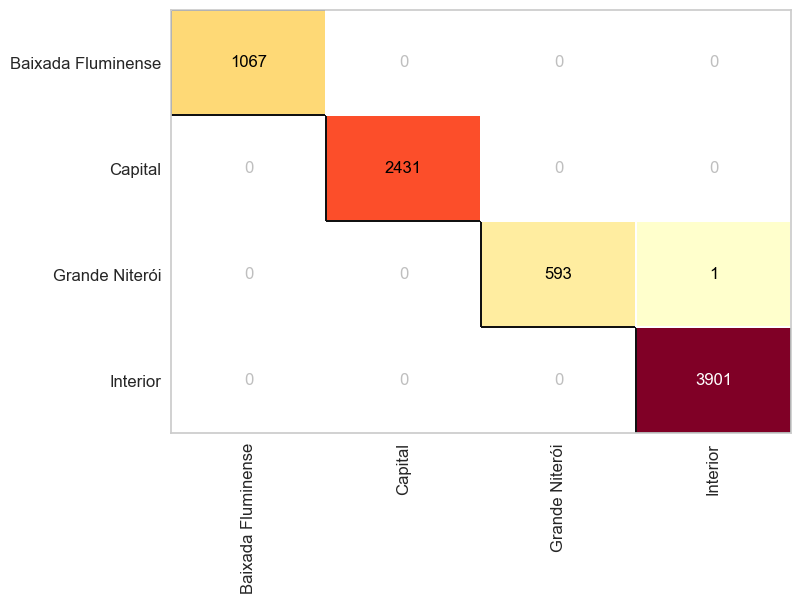

In [214]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_crimes)
cm.fit(x_crimes_treinamento, y_crimes_treinamento)
cm.score(x_crimes_teste, y_crimes_teste)

In [215]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
rf = rf.fit(x_crimes_treinamento, y_crimes_treinamento)
print("Acurácia: ", rf.score(x_crimes_treinamento, y_crimes_treinamento))
tp_rf = rf.predict(x_crimes_teste)
print("Acurácia de Previsão: ", accuracy_score(y_crimes_teste, tp_rf))
print(classification_report(y_crimes_teste, tp_rf))

Acurácia:  1.0
Acurácia de Previsão:  0.9998748905292131
                    precision    recall  f1-score   support

Baixada Fluminense       1.00      1.00      1.00      1067
           Capital       1.00      1.00      1.00      2431
    Grande Niterói       1.00      1.00      1.00       594
          Interior       1.00      1.00      1.00      3901

          accuracy                           1.00      7993
         macro avg       1.00      1.00      1.00      7993
      weighted avg       1.00      1.00      1.00      7993



In [216]:
report = classification_report(y_crimes_teste, tp_rf, output_dict=True)

In [217]:
acuracia = accuracy_score(y_crimes_teste, tp_rf)

In [218]:
df_resultados = df_resultados.append(append_df_resultado(list(report.items()), 
                                                         df_resultados, 
                                                         acuracia, 
                                                         "Random Forest"), ignore_index=True)

In [219]:
df_resultados = df_resultados.drop_duplicates().reset_index(drop=True)
df_resultados

regiao  acuracia  precisao  revocacao  f1-score  \
0   Baixada Fluminense  0.918178  0.932692   0.636364  0.756546   
1              Capital  0.918178  1.000000   0.988893  0.994416   
2       Grande Niterói  0.918178  0.875510   0.722222  0.791513   
3             Interior  0.918178  0.875543   0.981031  0.925290   
4   Baixada Fluminense  1.000000  1.000000   1.000000  1.000000   
5              Capital  1.000000  1.000000   1.000000  1.000000   
6       Grande Niterói  1.000000  1.000000   1.000000  1.000000   
7             Interior  1.000000  1.000000   1.000000  1.000000   
8   Baixada Fluminense  0.999875  1.000000   1.000000  1.000000   
9              Capital  0.999875  1.000000   1.000000  1.000000   
10      Grande Niterói  0.999875  1.000000   0.998316  0.999158   
11            Interior  0.999875  0.999744   1.000000  0.999872   

             algoritmo  
0          Naïve Bayes  
1          Naïve Bayes  
2          Naïve Bayes  
3          Naïve Bayes  
4   Árvore de Descisão  
5   Árvore de Descisão  
6   Árvore de Descisão  
7   Árvore de Descisão  
8        Random Forest  
9        Random Forest  
10       Random Forest  
11       Random Forest

#### 5.4 - KNN 96,84%

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
import pickle
with open('crimes.pkl', 'rb') as f:
  x_crimes, y_crimes = pickle.load(f)

In [222]:
with open('crimes_treinamento_teste.pkl', 'rb') as f:  
  x_crimes_treinamento, y_crimes_treinamento, x_crimes_teste, y_crimes_teste = pickle.load(f)

In [223]:
x_crimes_treinamento.shape, y_crimes_treinamento.shape

((23978, 16), (23978,))

In [224]:
x_crimes_teste.shape, y_crimes_teste.shape

((7993, 16), (7993,))

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn_crimes = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_crimes.fit(x_crimes_treinamento, y_crimes_treinamento)

KNeighborsClassifier()

In [226]:
previsoes = knn_crimes.predict(x_crimes_teste)
previsoes

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [227]:
y_crimes_teste

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [228]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_crimes_teste, previsoes) 

0.9684724133616914

0.9684724133616914

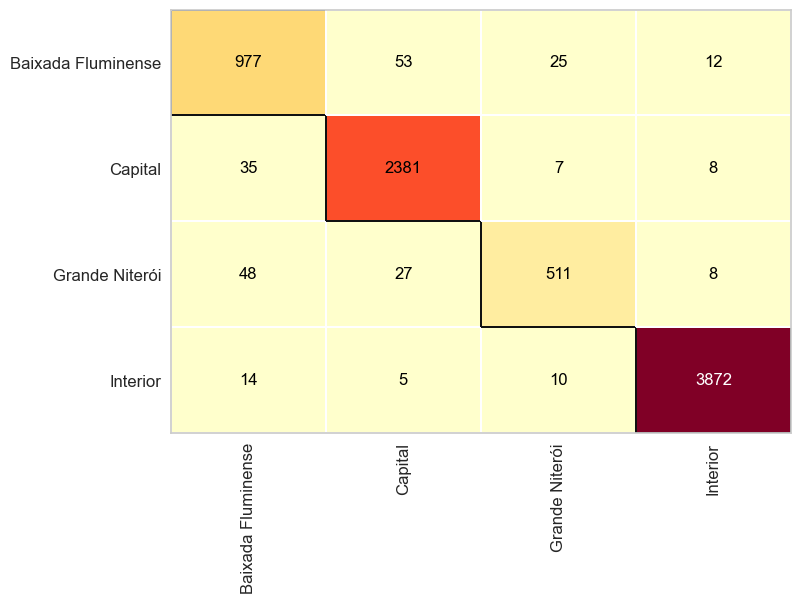

In [229]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_crimes)
cm.fit(x_crimes_treinamento, y_crimes_treinamento)
cm.score(x_crimes_teste, y_crimes_teste)

In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn = knn.fit(x_crimes_treinamento, y_crimes_treinamento)
print("Acurácia: ", knn.score(x_crimes_treinamento, y_crimes_treinamento))
knn_rf = knn.predict(x_crimes_teste)
print("Acurácia de Previsão: ", accuracy_score(y_crimes_teste, knn_rf))
print(classification_report(y_crimes_teste, knn_rf))

Acurácia:  0.9823588289265159
Acurácia de Previsão:  0.9684724133616914
                    precision    recall  f1-score   support

Baixada Fluminense       0.91      0.92      0.91      1067
           Capital       0.97      0.98      0.97      2431
    Grande Niterói       0.92      0.86      0.89       594
          Interior       0.99      0.99      0.99      3901

          accuracy                           0.97      7993
         macro avg       0.95      0.94      0.94      7993
      weighted avg       0.97      0.97      0.97      7993



In [231]:
report = classification_report(y_crimes_teste, knn_rf, output_dict=True)

In [232]:
acuracia = accuracy_score(y_crimes_teste, knn_rf)

In [233]:
df_resultados = df_resultados.append(append_df_resultado(list(report.items()), 
                                                         df_resultados, 
                                                         acuracia, 
                                                         "KNN"), ignore_index=True)

In [234]:
df_resultados = df_resultados.drop_duplicates().reset_index(drop=True)
df_resultados

regiao  acuracia  precisao  revocacao  f1-score  \
0   Baixada Fluminense  0.918178  0.932692   0.636364  0.756546   
1              Capital  0.918178  1.000000   0.988893  0.994416   
2       Grande Niterói  0.918178  0.875510   0.722222  0.791513   
3             Interior  0.918178  0.875543   0.981031  0.925290   
4   Baixada Fluminense  1.000000  1.000000   1.000000  1.000000   
5              Capital  1.000000  1.000000   1.000000  1.000000   
6       Grande Niterói  1.000000  1.000000   1.000000  1.000000   
7             Interior  1.000000  1.000000   1.000000  1.000000   
8   Baixada Fluminense  0.999875  1.000000   1.000000  1.000000   
9              Capital  0.999875  1.000000   1.000000  1.000000   
10      Grande Niterói  0.999875  1.000000   0.998316  0.999158   
11            Interior  0.999875  0.999744   1.000000  0.999872   
12  Baixada Fluminense  0.968472  0.909683   0.915651  0.912658   
13             Capital  0.968472  0.965531   0.979432  0.972432   
14      Grande Niterói  0.968472  0.924051   0.860269  0.891020   
15            Interior  0.968472  0.992821   0.992566  0.992693   

             algoritmo  
0          Naïve Bayes  
1          Naïve Bayes  
2          Naïve Bayes  
3          Naïve Bayes  
4   Árvore de Descisão  
5   Árvore de Descisão  
6   Árvore de Descisão  
7   Árvore de Descisão  
8        Random Forest  
9        Random Forest  
10       Random Forest  
11       Random Forest  
12                 KNN  
13                 KNN  
14                 KNN  
15                 KNN

#### 5.5 - SVM 97,43%

In [237]:
from sklearn.svm import SVC

In [238]:
import pickle
with open('crimes.pkl', 'rb') as f:
  x_crimes, y_crimes = pickle.load(f)

In [239]:
with open('crimes_treinamento_teste.pkl', 'rb') as f:  
  x_crimes_treinamento, y_crimes_treinamento, x_crimes_teste, y_crimes_teste = pickle.load(f)

In [240]:
x_crimes_treinamento.shape, y_crimes_treinamento.shape

((23978, 16), (23978,))

In [241]:
x_crimes_teste.shape, y_crimes_teste.shape

((7993, 16), (7993,))

In [242]:
from sklearn.svm import SVC
svm_crimes =  SVC(kernel='rbf', random_state=1, C = 8.0)
svm_crimes.fit(x_crimes_treinamento, y_crimes_treinamento)

SVC(C=8.0, random_state=1)

In [243]:
previsoes = svm_crimes.predict(x_crimes_teste)
previsoes

array(['Interior', 'Capital', 'Capital', ..., 'Baixada Fluminense',
       'Interior', 'Capital'], dtype=object)

In [244]:
y_crimes_teste

array(['Interior', 'Capital', 'Capital', ..., 'Capital', 'Interior',
       'Capital'], dtype=object)

In [245]:
from sklearn.metrics import accuracy_score, classification_report

In [246]:
accuracy_score(y_crimes_teste, previsoes)

0.9743525584886776

0.9743525584886776

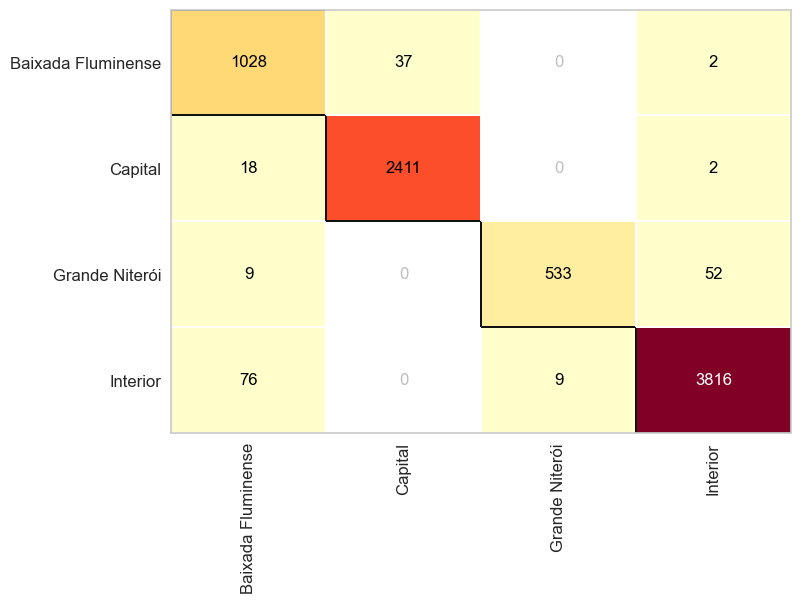

In [247]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_crimes)
cm.fit(x_crimes_treinamento, y_crimes_treinamento)
cm.score(x_crimes_teste, y_crimes_teste)

In [248]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=1, C = 8.0)
svc = svc.fit(x_crimes_treinamento, y_crimes_treinamento)
print("Acurácia: ", svc.score(x_crimes_treinamento, y_crimes_treinamento))
svc_rf = svc.predict(x_crimes_teste)
print("Acurácia de Previsão: ", accuracy_score(y_crimes_teste, svc_rf))
print(classification_report(y_crimes_teste, svc_rf))

Acurácia:  0.9737259154224706
Acurácia de Previsão:  0.9743525584886776
                    precision    recall  f1-score   support

Baixada Fluminense       0.91      0.96      0.94      1067
           Capital       0.98      0.99      0.99      2431
    Grande Niterói       0.98      0.90      0.94       594
          Interior       0.99      0.98      0.98      3901

          accuracy                           0.97      7993
         macro avg       0.97      0.96      0.96      7993
      weighted avg       0.97      0.97      0.97      7993



In [249]:
report = classification_report(y_crimes_teste, svc_rf, output_dict=True)

In [250]:
acuracia = accuracy_score(y_crimes_teste, svc_rf)

In [251]:
df_resultados = df_resultados.append(append_df_resultado(list(report.items()), 
                                                         df_resultados, 
                                                         acuracia, 
                                                         "SVM"), ignore_index=True)

In [252]:
df_resultados = df_resultados.drop_duplicates().reset_index(drop=True)
df_resultados

regiao  acuracia  precisao  revocacao  f1-score  \
0   Baixada Fluminense  0.918178  0.932692   0.636364  0.756546   
1              Capital  0.918178  1.000000   0.988893  0.994416   
2       Grande Niterói  0.918178  0.875510   0.722222  0.791513   
3             Interior  0.918178  0.875543   0.981031  0.925290   
4   Baixada Fluminense  1.000000  1.000000   1.000000  1.000000   
5              Capital  1.000000  1.000000   1.000000  1.000000   
6       Grande Niterói  1.000000  1.000000   1.000000  1.000000   
7             Interior  1.000000  1.000000   1.000000  1.000000   
8   Baixada Fluminense  0.999875  1.000000   1.000000  1.000000   
9              Capital  0.999875  1.000000   1.000000  1.000000   
10      Grande Niterói  0.999875  1.000000   0.998316  0.999158   
11            Interior  0.999875  0.999744   1.000000  0.999872   
12  Baixada Fluminense  0.968472  0.909683   0.915651  0.912658   
13             Capital  0.968472  0.965531   0.979432  0.972432   
14      Grande Niterói  0.968472  0.924051   0.860269  0.891020   
15            Interior  0.968472  0.992821   0.992566  0.992693   
16  Baixada Fluminense  0.974353  0.908930   0.963449  0.935396   
17             Capital  0.974353  0.984886   0.991773  0.988317   
18      Grande Niterói  0.974353  0.983395   0.897306  0.938380   
19            Interior  0.974353  0.985537   0.978211  0.981860   

             algoritmo  
0          Naïve Bayes  
1          Naïve Bayes  
2          Naïve Bayes  
3          Naïve Bayes  
4   Árvore de Descisão  
5   Árvore de Descisão  
6   Árvore de Descisão  
7   Árvore de Descisão  
8        Random Forest  
9        Random Forest  
10       Random Forest  
11       Random Forest  
12                 KNN  
13                 KNN  
14                 KNN  
15                 KNN  
16                 SVM  
17                 SVM  
18                 SVM  
19                 SVM

#### 6 - Gráfico de Apresentação de Resultados

##### Resultados Região Capital

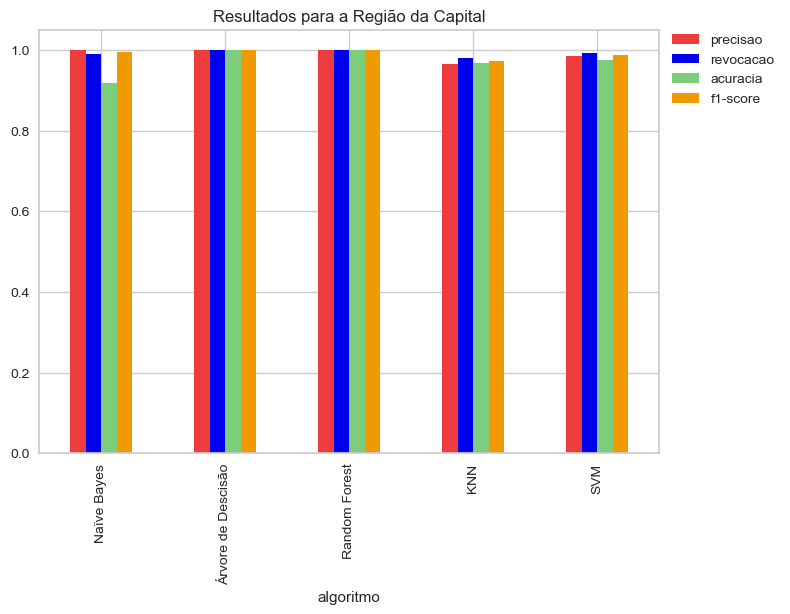

In [253]:
df_result_capital = df_resultados.query("regiao=='Capital'")
ax = df_result_capital.plot(x="algoritmo", y=["precisao", "revocacao", "acuracia", "f1-score"],
                            color=['#EE3B3B', '#0000EE', '#7CCD7C', '#EE9A00'],
                            kind="bar")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Resultados para a Região da Capital")
plt.show()

In [254]:
df_result_capital

regiao  acuracia  precisao  revocacao  f1-score           algoritmo
1   Capital  0.918178  1.000000   0.988893  0.994416         Naïve Bayes
5   Capital  1.000000  1.000000   1.000000  1.000000  Árvore de Descisão
9   Capital  0.999875  1.000000   1.000000  1.000000       Random Forest
13  Capital  0.968472  0.965531   0.979432  0.972432                 KNN
17  Capital  0.974353  0.984886   0.991773  0.988317                 SVM

##### Resultados Regiao Baixada Fluminense

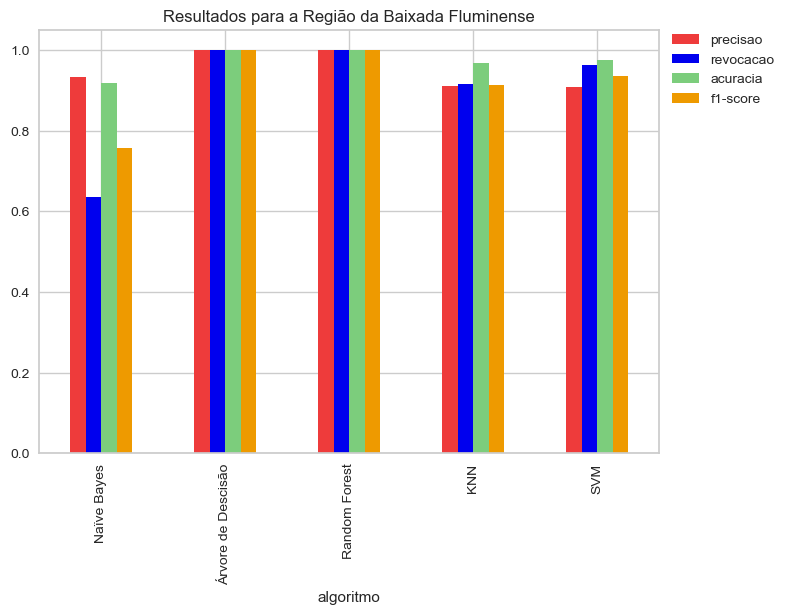

In [255]:
df_result_baixada = df_resultados.query("regiao=='Baixada Fluminense'")
ax = df_result_baixada.plot(x="algoritmo", y=["precisao", "revocacao", "acuracia", "f1-score"],
                            color=['#EE3B3B', '#0000EE', '#7CCD7C', '#EE9A00'],
                            kind="bar")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Resultados para a Região da Baixada Fluminense")
plt.show()

In [256]:
df_result_baixada

regiao  acuracia  precisao  revocacao  f1-score  \
0   Baixada Fluminense  0.918178  0.932692   0.636364  0.756546   
4   Baixada Fluminense  1.000000  1.000000   1.000000  1.000000   
8   Baixada Fluminense  0.999875  1.000000   1.000000  1.000000   
12  Baixada Fluminense  0.968472  0.909683   0.915651  0.912658   
16  Baixada Fluminense  0.974353  0.908930   0.963449  0.935396   

             algoritmo  
0          Naïve Bayes  
4   Árvore de Descisão  
8        Random Forest  
12                 KNN  
16                 SVM

##### Resultados Interior

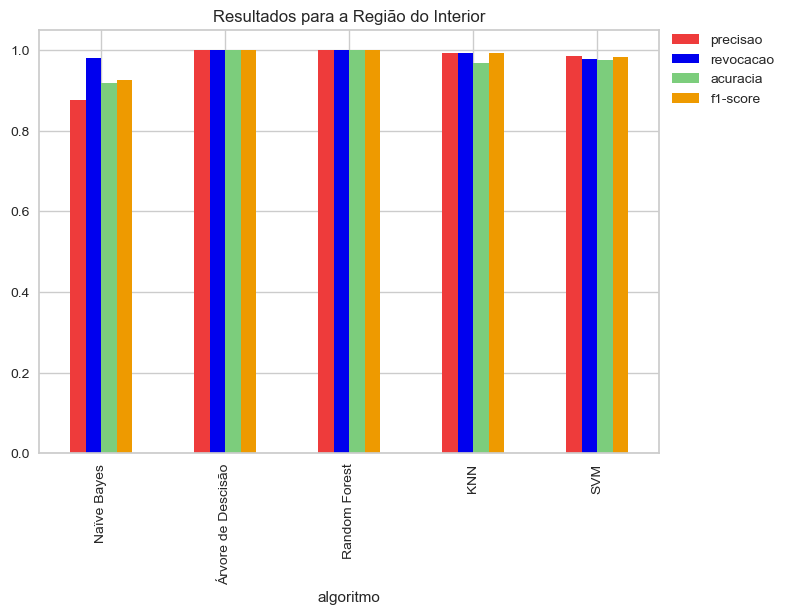

In [257]:
df_result_interior = df_resultados.query("regiao=='Interior'")
ax = df_result_interior.plot(x="algoritmo", y=["precisao", "revocacao", "acuracia", "f1-score"],
                            color=['#EE3B3B', '#0000EE', '#7CCD7C', '#EE9A00'],
                            kind="bar")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Resultados para a Região do Interior")
plt.show()

In [258]:
df_result_interior

regiao  acuracia  precisao  revocacao  f1-score           algoritmo
3   Interior  0.918178  0.875543   0.981031  0.925290         Naïve Bayes
7   Interior  1.000000  1.000000   1.000000  1.000000  Árvore de Descisão
11  Interior  0.999875  0.999744   1.000000  0.999872       Random Forest
15  Interior  0.968472  0.992821   0.992566  0.992693                 KNN
19  Interior  0.974353  0.985537   0.978211  0.981860                 SVM

##### Resultados Grande Niterói

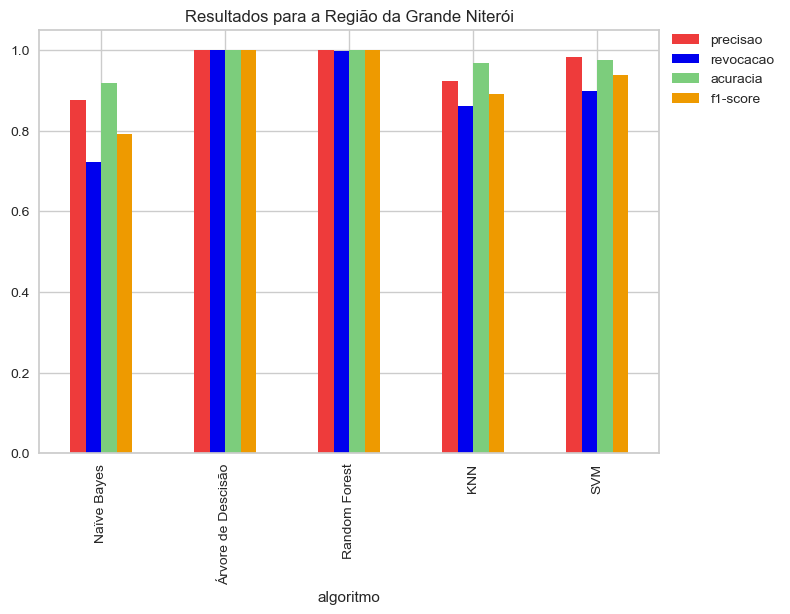

In [259]:
df_result_grande_niteroi = df_resultados.query("regiao=='Grande Niterói'")
ax = df_result_grande_niteroi.plot(x="algoritmo", y=["precisao", "revocacao", "acuracia", "f1-score"],
                            color=['#EE3B3B', '#0000EE', '#7CCD7C', '#EE9A00'],
                            kind="bar")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Resultados para a Região da Grande Niterói")
plt.show()

In [260]:
df_result_grande_niteroi

regiao  acuracia  precisao  revocacao  f1-score  \
2   Grande Niterói  0.918178  0.875510   0.722222  0.791513   
6   Grande Niterói  1.000000  1.000000   1.000000  1.000000   
10  Grande Niterói  0.999875  1.000000   0.998316  0.999158   
14  Grande Niterói  0.968472  0.924051   0.860269  0.891020   
18  Grande Niterói  0.974353  0.983395   0.897306  0.938380   

             algoritmo  
2          Naïve Bayes  
6   Árvore de Descisão  
10       Random Forest  
14                 KNN  
18                 SVM